# Anomali Analizleri ve Uyarƒ± Sistemleri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
# Veriyi y√ºkle
df = pd.read_csv("yeni_veri/firin_verileri_temizlenmis.csv")

In [3]:
df.head()

datetime  prg  giris_isi  on_isitma_set_isi  on_isitma_isi  \
0  2024-11-01 08:00:00  1.0      337.0              550.0          549.0   
1  2024-11-01 08:01:00  1.0      343.0              550.0          547.0   
2  2024-11-01 08:02:00  1.0      336.0              550.0          551.0   
3  2024-11-01 08:03:00  1.0      329.0              550.0          547.0   
4  2024-11-01 08:04:00  1.0      345.0              550.0          552.0   

   on_isitma_guc_%  on_isitma_amp.  ceh.1_ust1_set_isi  ceh.1_ust1_isi  \
0             75.0           647.0               680.0           705.0   
1             75.0           641.0               680.0           701.0   
2             74.0           638.0               680.0           704.0   
3             75.0           645.0               680.0           709.0   
4             69.0           495.0               680.0           704.0   

   ceh.1_ust1_guc_%  ...  ceh.3_alt2_set_isi  ceh.3_alt2_isi  \
0               0.0  ...               840.0           838.0   
1               0.0  ...               840.0           841.0   
2               0.0  ...               840.0           843.0   
3               0.0  ...               840.0           843.0   
4               0.0  ...               840.0           840.0   

   ceh.3_alt2_guc_%  ceh.3_alt2_amp.  sogutma1_isi  sogutma2_isi  \
0              36.0            305.0         738.0         636.0   
1              39.0            336.0         740.0         639.0   
2              25.0            266.0         738.0         636.0   
3              10.0            149.0         740.0         639.0   
4              10.0            148.0         737.0         636.0   

   sogutma3_isi  rulo_frekans_hz  giris_per.fan_hz  cikis_per.fan_hz  
0         504.0           3250.0            2750.0               0.0  
1         505.0           3250.0            2750.0               0.0  
2         505.0           3250.0            2750.0               0.0  
3         505.0           3250.0            2750.0               0.0  
4         504.0           3250.0            2750.0               0.0  

[5 rows x 57 columns]

In [4]:
df.shape

(22140, 57)

In [5]:
# S√ºtun kontrol 
print(df.columns)

Index(['datetime', 'prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.

# ‚ÄúAni 0'lanmalar Olmayan‚Äù ve "Sabit Deƒüerler ƒ∞√ßermeyen" S√úTUNLAR √úZERƒ∞NDE ANALƒ∞Z

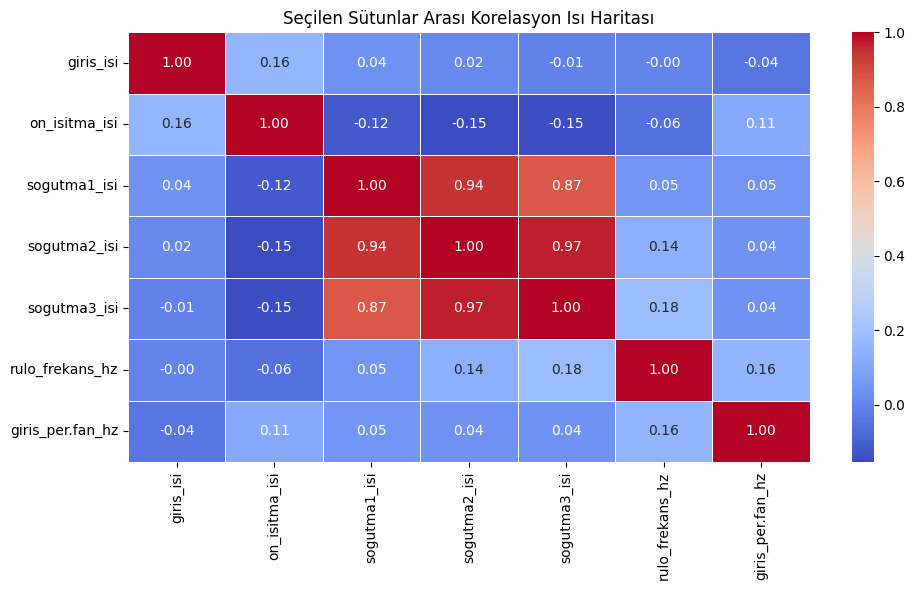

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target_columns = [
    "giris_isi",
    "on_isitma_isi",
    "sogutma1_isi",
    "sogutma2_isi",
    "sogutma3_isi",
    "rulo_frekans_hz",
    "giris_per.fan_hz"
]

selected_df = df[target_columns]

# Korelasyon matrisi
corr_matrix = selected_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Se√ßilen S√ºtunlar Arasƒ± Korelasyon Isƒ± Haritasƒ±")
plt.tight_layout()
plt.show()

#### `sogutma1_isi`, `sogutma2_isi`, `sogutma3_isi` ƒ∞√ßin Rolling Z-score ile Anomali Tespiti  

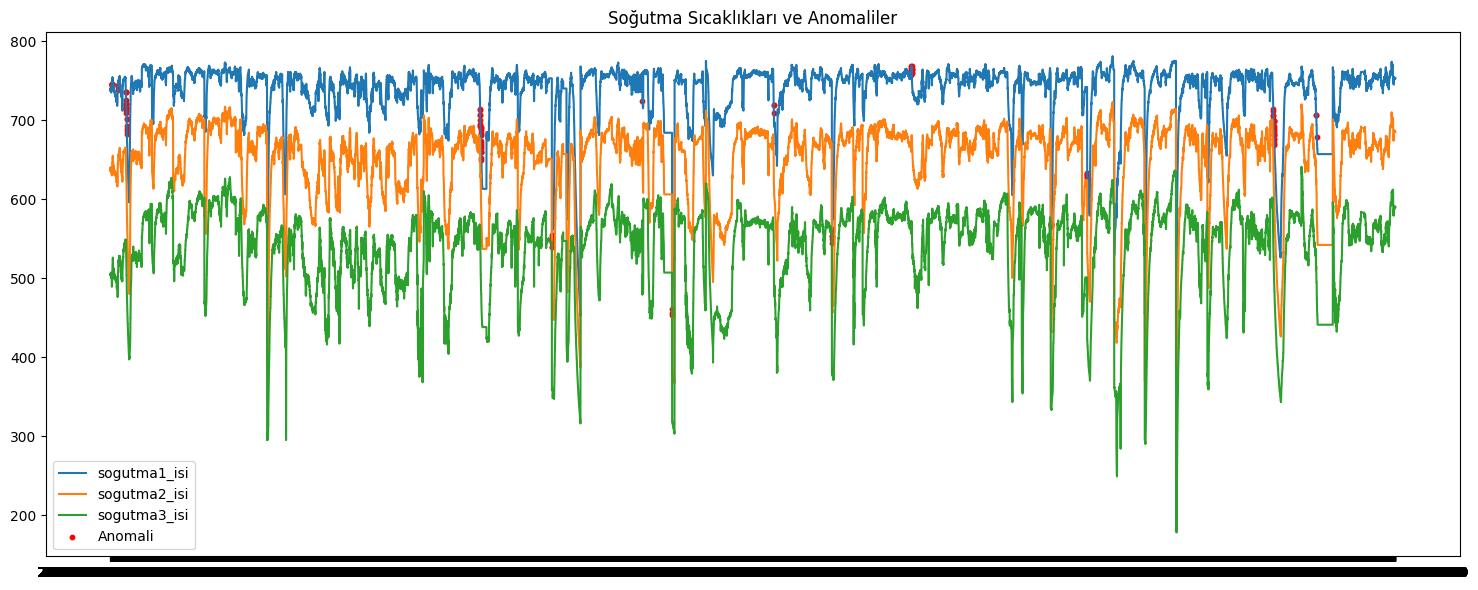

Toplam Anomali Sayƒ±sƒ±: 133


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df.set_index("datetime", inplace=True)

cols = ["sogutma1_isi", "sogutma2_isi", "sogutma3_isi"]
data = df[cols]

# Rolling z-score hesaplayan fonksiyon
def rolling_zscore(series, window=540):
    return (series - series.rolling(window, min_periods=1).mean()) / series.rolling(window, min_periods=1).std()

# Her s√ºtun i√ßin rolling z-score hesapla
z_scores = data.apply(lambda col: rolling_zscore(col, window=540))

# Z-score farklarƒ±nƒ± hesapla
z_diff_1_2 = (z_scores["sogutma1_isi"] - z_scores["sogutma2_isi"]).abs()
z_diff_2_3 = (z_scores["sogutma2_isi"] - z_scores["sogutma3_isi"]).abs()
z_diff_1_3 = (z_scores["sogutma1_isi"] - z_scores["sogutma3_isi"]).abs()

# Anomali e≈üik deƒüeri
threshold = 2.5

# Anomali maskesi olu≈ütur
anomaly_mask = (z_diff_1_2 > threshold) | (z_diff_2_3 > threshold) | (z_diff_1_3 > threshold)

# Anomali etiketlerini dataframe'e ekle
df["sogutma_anomali"] = anomaly_mask.astype(int)


plt.figure(figsize=(15,6))
plt.plot(df.index, data["sogutma1_isi"], label="sogutma1_isi")
plt.plot(df.index, data["sogutma2_isi"], label="sogutma2_isi")
plt.plot(df.index, data["sogutma3_isi"], label="sogutma3_isi")
plt.scatter(df.index[anomaly_mask], data["sogutma1_isi"][anomaly_mask], color="red", label="Anomali", s=10)
plt.title("Soƒüutma Sƒ±caklƒ±klarƒ± ve Anomaliler")
plt.legend()
plt.tight_layout()
plt.show()

# Anomali zamanlarƒ±
anomaly_times = df[df["sogutma_anomali"] == 1].index
print(f"Toplam Anomali Sayƒ±sƒ±: {len(anomaly_times)}")


In [8]:
df.columns

Index(['prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.',
       'c

In [9]:
df.head()

prg  giris_isi  on_isitma_set_isi  on_isitma_isi  \
datetime                                                                
2024-11-01 08:00:00  1.0      337.0              550.0          549.0   
2024-11-01 08:01:00  1.0      343.0              550.0          547.0   
2024-11-01 08:02:00  1.0      336.0              550.0          551.0   
2024-11-01 08:03:00  1.0      329.0              550.0          547.0   
2024-11-01 08:04:00  1.0      345.0              550.0          552.0   

                     on_isitma_guc_%  on_isitma_amp.  ceh.1_ust1_set_isi  \
datetime                                                                   
2024-11-01 08:00:00             75.0           647.0               680.0   
2024-11-01 08:01:00             75.0           641.0               680.0   
2024-11-01 08:02:00             74.0           638.0               680.0   
2024-11-01 08:03:00             75.0           645.0               680.0   
2024-11-01 08:04:00             69.0           495.0               680.0   

                     ceh.1_ust1_isi  ceh.1_ust1_guc_%  ceh.1_ust1_amp.  ...  \
datetime                                                                ...   
2024-11-01 08:00:00           705.0               0.0              0.0  ...   
2024-11-01 08:01:00           701.0               0.0              0.0  ...   
2024-11-01 08:02:00           704.0               0.0              0.0  ...   
2024-11-01 08:03:00           709.0               0.0              0.0  ...   
2024-11-01 08:04:00           704.0               0.0              0.0  ...   

                     ceh.3_alt2_isi  ceh.3_alt2_guc_%  ceh.3_alt2_amp.  \
datetime                                                                 
2024-11-01 08:00:00           838.0              36.0            305.0   
2024-11-01 08:01:00           841.0              39.0            336.0   
2024-11-01 08:02:00           843.0              25.0            266.0   
2024-11-01 08:03:00           843.0              10.0            149.0   
2024-11-01 08:04:00           840.0              10.0            148.0   

                     sogutma1_isi  sogutma2_isi  sogutma3_isi  \
datetime                                                        
2024-11-01 08:00:00         738.0         636.0         504.0   
2024-11-01 08:01:00         740.0         639.0         505.0   
2024-11-01 08:02:00         738.0         636.0         505.0   
2024-11-01 08:03:00         740.0         639.0         505.0   
2024-11-01 08:04:00         737.0         636.0         504.0   

                     rulo_frekans_hz  giris_per.fan_hz  cikis_per.fan_hz  \
datetime                                                                   
2024-11-01 08:00:00           3250.0            2750.0               0.0   
2024-11-01 08:01:00           3250.0            2750.0               0.0   
2024-11-01 08:02:00           3250.0            2750.0               0.0   
2024-11-01 08:03:00           3250.0            2750.0               0.0   
2024-11-01 08:04:00           3250.0            2750.0               0.0   

                     sogutma_anomali  
datetime                              
2024-11-01 08:00:00                0  
2024-11-01 08:01:00                0  
2024-11-01 08:02:00                0  
2024-11-01 08:03:00                0  
2024-11-01 08:04:00                0  

[5 rows x 57 columns]

### Diƒüer S√ºtunlarƒ±n Anomali Analizi 
- Her tekil sens√∂r kolonu i√ßin istatistiksel anomali tespiti yapƒ±ldƒ±

In [10]:

import pandas as pd
import numpy as np

def rolling_zscore_anomali(df, column, window=540, threshold=3):
    rolling_mean = df[column].rolling(window=window, min_periods=1).mean()
    rolling_std = df[column].rolling(window=window, min_periods=1).std()
    z_scores = (df[column] - rolling_mean) / rolling_std
    return (np.abs(z_scores) > threshold).astype(int)

# Hedef kolonlar
target_columns = [
    "giris_isi",
    "on_isitma_isi",
    "rulo_frekans_hz",
    "giris_per.fan_hz"
]

# Anomali s√ºtunlarƒ±nƒ± olu≈ütur
for col in target_columns:
    anomali_col = f"{col}_anomali"
    df[anomali_col] = rolling_zscore_anomali(df, col)

# Sonu√ßlarƒ± √∂zetleme
anomaly_summary = {
    col: df[f"{col}_anomali"].sum()
    for col in target_columns
}

print("üîç Anomali Sayƒ±larƒ±:")
for col, count in anomaly_summary.items():
    print(f"{col}: {count} adet")

# ƒ∞lk birka√ß satƒ±rs
df[[col for col in df.columns if "anomali" in col]].head()


üîç Anomali Sayƒ±larƒ±:
giris_isi: 725 adet
on_isitma_isi: 462 adet
rulo_frekans_hz: 514 adet
giris_per.fan_hz: 525 adet


sogutma_anomali  giris_isi_anomali  \
datetime                                                  
2024-11-01 08:00:00                0                  0   
2024-11-01 08:01:00                0                  0   
2024-11-01 08:02:00                0                  0   
2024-11-01 08:03:00                0                  0   
2024-11-01 08:04:00                0                  0   

                     on_isitma_isi_anomali  rulo_frekans_hz_anomali  \
datetime                                                              
2024-11-01 08:00:00                      0                        0   
2024-11-01 08:01:00                      0                        0   
2024-11-01 08:02:00                      0                        0   
2024-11-01 08:03:00                      0                        0   
2024-11-01 08:04:00                      0                        0   

                     giris_per.fan_hz_anomali  
datetime                                       
2024-11-01 08:00:00                         0  
2024-11-01 08:01:00                         0  
2024-11-01 08:02:00                         0  
2024-11-01 08:03:00                         0  
2024-11-01 08:04:00                         0

#### Uzun S√ºreli Anomaliler (5 dakikadan uzun)

In [11]:
def grupla_anomaliler(df, column_anomali, min_uzunluk=5):
    df['grup'] = (df[column_anomali] != df[column_anomali].shift()).cumsum()
    gruplar = df.groupby('grup')[column_anomali].sum()
    uzun_gruplar = gruplar[gruplar >= min_uzunluk].index
    return df[df['grup'].isin(uzun_gruplar)]

# Anomali s√ºtunlarƒ±
anomali_sutunlari = [
    'giris_isi_anomali',
    'on_isitma_isi_anomali',
    'sogutma_anomali',
    'rulo_frekans_hz_anomali',
    'giris_per.fan_hz_anomali'
]

# Her biri i√ßin uzun anomalileri bulunur
for sutun in anomali_sutunlari:
    uzun_anomaliler = grupla_anomaliler(df.copy(), sutun, min_uzunluk=5)
    print(f"{sutun} - Uzun anomaliler: {uzun_anomaliler.shape[0]} satƒ±r")


giris_isi_anomali - Uzun anomaliler: 657 satƒ±r
on_isitma_isi_anomali - Uzun anomaliler: 414 satƒ±r
sogutma_anomali - Uzun anomaliler: 112 satƒ±r
rulo_frekans_hz_anomali - Uzun anomaliler: 388 satƒ±r


giris_per.fan_hz_anomali - Uzun anomaliler: 354 satƒ±r


## Anomali Etki Analizi (Impact Analysis)

- Anomali tespiti yapƒ±lan s√ºtunlarƒ±n, diƒüer hedef s√ºtunlardaki etkileri incelendi. Z-score ile bulunan anomali zamanlarƒ±nda diƒüer s√ºtunlarƒ±n ortalama ve standart sapma deƒüerleri kar≈üƒ±la≈ütƒ±rƒ±ldƒ±.

In [12]:
# üîç Anomali kolonlarƒ± ve hedef kolonlar
anomaly_columns = [
    "giris_isi_anomali",
    "on_isitma_isi_anomali",
    "sogutma_anomali",
    "rulo_frekans_hz_anomali",
    "giris_per.fan_hz_anomali"
]

# Hedef kolonlar (etkisinin incelemek istendiƒüi kolonlar)
target_cols = [
    "giris_isi", "on_isitma_isi", "sogutma1_isi", 
    "sogutma2_isi", "sogutma3_isi", "rulo_frekans_hz", "giris_per.fan_hz"
]

# Her anomaly_col ve target_col kombinasyonu i√ßin analiz
for anomaly_col in anomaly_columns:
    print(f"\nüß™ Anomali Kolonu: {anomaly_col}")
    for col in target_cols:
        try:
            normal_vals = df[df[anomaly_col] == 0][col]
            anomaly_vals = df[df[anomaly_col] == 1][col]

            print(f"\nüéØ Hedef Kolon: {col}")
            print(f"‚Ä¢ Normal Ortalama: {normal_vals.mean():.2f}")
            print(f"‚Ä¢ Anomali Ortalama: {anomaly_vals.mean():.2f}")
            print(f"‚Ä¢ Ortalama Farkƒ±: {(anomaly_vals.mean() - normal_vals.mean()):.2f}")
            print(f"‚Ä¢ Normal Std: {normal_vals.std():.2f}")
            print(f"‚Ä¢ Anomali Std: {anomaly_vals.std():.2f}")
            print(f"‚Ä¢ Std Farkƒ±: {(anomaly_vals.std() - normal_vals.std()):.2f}")
            print("-" * 50)
        except Exception as e:
            print(f"‚ö†Ô∏è {anomaly_col} - {col} analizinde hata: {e}")
            print("-" * 50)



üß™ Anomali Kolonu: giris_isi_anomali

üéØ Hedef Kolon: giris_isi
‚Ä¢ Normal Ortalama: 190.98
‚Ä¢ Anomali Ortalama: -1720.56
‚Ä¢ Ortalama Farkƒ±: -1911.53
‚Ä¢ Normal Std: 710.34
‚Ä¢ Anomali Std: 1858.17
‚Ä¢ Std Farkƒ±: 1147.84
--------------------------------------------------

üéØ Hedef Kolon: on_isitma_isi
‚Ä¢ Normal Ortalama: 530.02
‚Ä¢ Anomali Ortalama: 523.45
‚Ä¢ Ortalama Farkƒ±: -6.57
‚Ä¢ Normal Std: 24.71
‚Ä¢ Anomali Std: 40.58
‚Ä¢ Std Farkƒ±: 15.87
--------------------------------------------------

üéØ Hedef Kolon: sogutma1_isi
‚Ä¢ Normal Ortalama: 737.87
‚Ä¢ Anomali Ortalama: 715.88
‚Ä¢ Ortalama Farkƒ±: -22.00
‚Ä¢ Normal Std: 38.80
‚Ä¢ Anomali Std: 60.82
‚Ä¢ Std Farkƒ±: 22.02
--------------------------------------------------

üéØ Hedef Kolon: sogutma2_isi
‚Ä¢ Normal Ortalama: 649.97
‚Ä¢ Anomali Ortalama: 629.40
‚Ä¢ Ortalama Farkƒ±: -20.57
‚Ä¢ Normal Std: 53.21
‚Ä¢ Anomali Std: 73.39
‚Ä¢ Std Farkƒ±: 20.17
--------------------------------------------------

üéØ Hedef Ko

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Anomali s√ºtunlarƒ±
anomaly_columns = [
    "giris_isi_anomali",
    "on_isitma_isi_anomali",
    "sogutma_anomali",
    "rulo_frekans_hz_anomali",
    "giris_per.fan_hz_anomali"
]

# Hedef kolonlar (etkisinin incelenmek istedinƒüi kolonlar)
target_cols = [
    "giris_isi", "on_isitma_isi", "sogutma1_isi", 
    "sogutma2_isi", "sogutma3_isi", "rulo_frekans_hz", "giris_per.fan_hz"
]

# Verileri saklamak i√ßin bo≈ü dict
heatmap_mean_data = {}
heatmap_std_data = {}

# Her anomali kolonu i√ßin
for anomaly_col in anomaly_columns:
    mean_diffs = []
    std_diffs = []

    for col in target_cols:
        normal_vals = df[df[anomaly_col] == False][col]
        anomaly_vals = df[df[anomaly_col] == True][col]

        mean_diff = anomaly_vals.mean() - normal_vals.mean()
        std_diff = anomaly_vals.std() - normal_vals.std()

        mean_diffs.append(mean_diff)
        std_diffs.append(std_diff)

    heatmap_mean_data[anomaly_col] = mean_diffs
    heatmap_std_data[anomaly_col] = std_diffs

# DataFrame'e √ßevir
df_mean_diff = pd.DataFrame(heatmap_mean_data, index=target_cols)
df_std_diff = pd.DataFrame(heatmap_std_data, index=target_cols)


c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\947349519.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


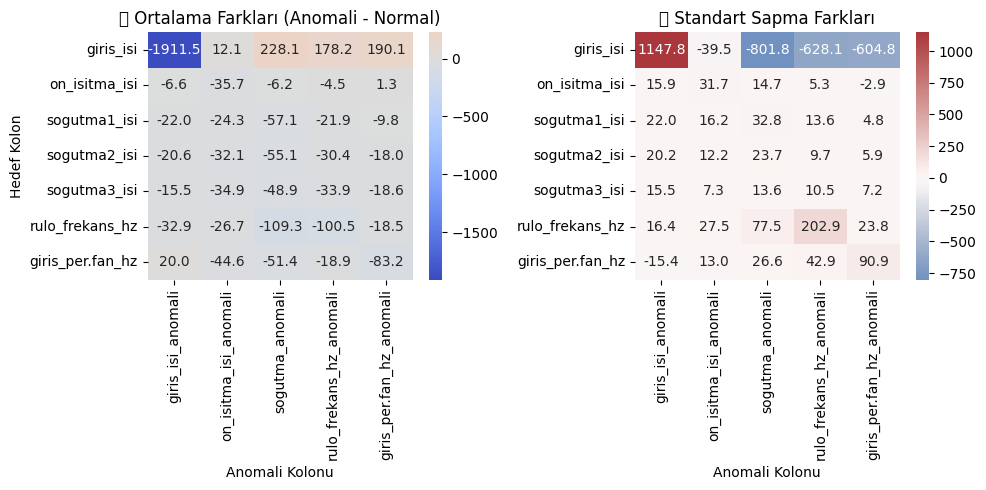

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(df_mean_diff, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title("üìä Ortalama Farklarƒ± (Anomali - Normal)")
plt.xlabel("Anomali Kolonu")
plt.ylabel("Hedef Kolon")

plt.subplot(1, 2, 2)
sns.heatmap(df_std_diff, annot=True, fmt=".1f", cmap="vlag", center=0)
plt.title("üìä Standart Sapma Farklarƒ±")
plt.xlabel("Anomali Kolonu")
plt.ylabel("")

plt.tight_layout()
plt.show()

## Uyarƒ± Sistemi Olu≈üturma

Ama√ß, sensor verilerindeki kritik deƒüi≈üimleri algƒ±layan, a√ßƒ±klayƒ±cƒ± ve g√ºvenilir bir uyarƒ± sistemi kurmak.

In [15]:
def istatistikleri_hesapla(df):
    stats = {}
    kolonlar = [
        'giris_isi', 'sogutma1_isi', 'sogutma2_isi', 'sogutma3_isi',
        'rulo_frekans_hz', 'giris_per.fan_hz'
    ]

    # Anomali olmayan verileri filtrele
    normal_df = df[
        (df['giris_isi_anomali'] == 0) &
        (df['sogutma_anomali'] == 0) &
        (df['rulo_frekans_hz_anomali'] == 0) &
        (df['giris_per.fan_hz_anomali'] == 0)
    ]

    for col in kolonlar:
        stats[col] = {
            'normal_mean': normal_df[col].mean(),
            'normal_std': normal_df[col].std()
        }

    return stats


In [16]:
def uyarilari_olustur(df, stats):
    uyarilar = []

    for _, row in df.iterrows():
        uyarilar_listesi = []

        # Kritik: Giri≈ü ƒ±sƒ±sƒ±nda ani d√º≈ü√º≈ü
        if row['giris_isi'] < stats['giris_isi']['normal_mean'] - 2 * stats['giris_isi']['normal_std']:
            uyarilar_listesi.append("üö® Giri≈ü Isƒ± D√º≈ü√º≈ü√º")

        # Soƒüutma sisteminde d√º≈ü√º≈ü
        for sogutma in ['sogutma1_isi', 'sogutma2_isi', 'sogutma3_isi']:
            if row[sogutma] < stats[sogutma]['normal_mean'] - 2 * stats[sogutma]['normal_std']:
                uyarilar_listesi.append(f"‚ö†Ô∏è {sogutma.upper()} D√º≈ü√º≈ü√º")

        # Rulo frekans artƒ±≈üƒ±
        if row['rulo_frekans_hz'] > stats['rulo_frekans_hz']['normal_mean'] + 2 * stats['rulo_frekans_hz']['normal_std']:
            uyarilar_listesi.append("‚ö†Ô∏è Rulo Frekans Artƒ±≈üƒ±")

        # Fan hƒ±zƒ± d√º≈ü√º≈ü√º
        if row['giris_per.fan_hz'] < stats['giris_per.fan_hz']['normal_mean'] - 2 * stats['giris_per.fan_hz']['normal_std']:
            uyarilar_listesi.append("‚ö†Ô∏è Fan Hƒ±zƒ± D√º≈ü√º≈ü√º")

        # Uyarƒ± sonucu
        if uyarilar_listesi:
            uyarilar.append(", ".join(uyarilar_listesi))
        else:
            uyarilar.append("‚úÖ Normal")

    df['uyari'] = uyarilar
    return df


In [17]:
# ƒ∞statistikleri hesapla
stats = istatistikleri_hesapla(df)

# Uyarƒ±larƒ± olu≈ütur
df = uyarilari_olustur(df, stats)

In [18]:
df.columns

Index(['prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.',
       'c

In [19]:
toplam_uyari_sayisi = df[df['uyari'] != "‚úÖ Normal"].shape[0]
print(f"üîî Toplam Uyarƒ± Sayƒ±sƒ±: {toplam_uyari_sayisi}")


üîî Toplam Uyarƒ± Sayƒ±sƒ±: 4766


In [20]:
from collections import Counter

uyari_listesi = df[df['uyari'] != "‚úÖ Normal"]['uyari'].str.split(', ')
flat_list = [u for sublist in uyari_listesi for u in sublist]
toplam_bireysel_uyari_sayisi = len(flat_list)

print(f"üîî Bireysel Toplam Uyarƒ± Sayƒ±sƒ±: {toplam_bireysel_uyari_sayisi}")
print(Counter(flat_list))


üîî Bireysel Toplam Uyarƒ± Sayƒ±sƒ±: 7125
Counter({'‚ö†Ô∏è Fan Hƒ±zƒ± D√º≈ü√º≈ü√º': 1452, '‚ö†Ô∏è SOGUTMA2_ISI D√º≈ü√º≈ü√º': 1356, '‚ö†Ô∏è SOGUTMA1_ISI D√º≈ü√º≈ü√º': 1283, 'üö® Giri≈ü Isƒ± D√º≈ü√º≈ü√º': 1259, '‚ö†Ô∏è SOGUTMA3_ISI D√º≈ü√º≈ü√º': 1122, '‚ö†Ô∏è Rulo Frekans Artƒ±≈üƒ±': 653})


In [21]:
df.shape

(22140, 62)

In [22]:
df.head()

prg  giris_isi  on_isitma_set_isi  on_isitma_isi  \
datetime                                                                
2024-11-01 08:00:00  1.0      337.0              550.0          549.0   
2024-11-01 08:01:00  1.0      343.0              550.0          547.0   
2024-11-01 08:02:00  1.0      336.0              550.0          551.0   
2024-11-01 08:03:00  1.0      329.0              550.0          547.0   
2024-11-01 08:04:00  1.0      345.0              550.0          552.0   

                     on_isitma_guc_%  on_isitma_amp.  ceh.1_ust1_set_isi  \
datetime                                                                   
2024-11-01 08:00:00             75.0           647.0               680.0   
2024-11-01 08:01:00             75.0           641.0               680.0   
2024-11-01 08:02:00             74.0           638.0               680.0   
2024-11-01 08:03:00             75.0           645.0               680.0   
2024-11-01 08:04:00             69.0           495.0               680.0   

                     ceh.1_ust1_isi  ceh.1_ust1_guc_%  ceh.1_ust1_amp.  ...  \
datetime                                                                ...   
2024-11-01 08:00:00           705.0               0.0              0.0  ...   
2024-11-01 08:01:00           701.0               0.0              0.0  ...   
2024-11-01 08:02:00           704.0               0.0              0.0  ...   
2024-11-01 08:03:00           709.0               0.0              0.0  ...   
2024-11-01 08:04:00           704.0               0.0              0.0  ...   

                     sogutma3_isi  rulo_frekans_hz  giris_per.fan_hz  \
datetime                                                               
2024-11-01 08:00:00         504.0           3250.0            2750.0   
2024-11-01 08:01:00         505.0           3250.0            2750.0   
2024-11-01 08:02:00         505.0           3250.0            2750.0   
2024-11-01 08:03:00         505.0           3250.0            2750.0   
2024-11-01 08:04:00         504.0           3250.0            2750.0   

                     cikis_per.fan_hz  sogutma_anomali  giris_isi_anomali  \
datetime                                                                    
2024-11-01 08:00:00               0.0                0                  0   
2024-11-01 08:01:00               0.0                0                  0   
2024-11-01 08:02:00               0.0                0                  0   
2024-11-01 08:03:00               0.0                0                  0   
2024-11-01 08:04:00               0.0                0                  0   

                     on_isitma_isi_anomali  rulo_frekans_hz_anomali  \
datetime                                                              
2024-11-01 08:00:00                      0                        0   
2024-11-01 08:01:00                      0                        0   
2024-11-01 08:02:00                      0                        0   
2024-11-01 08:03:00                      0                        0   
2024-11-01 08:04:00                      0                        0   

                     giris_per.fan_hz_anomali               uyari  
datetime                                                           
2024-11-01 08:00:00                         0  ‚ö†Ô∏è Fan Hƒ±zƒ± D√º≈ü√º≈ü√º  
2024-11-01 08:01:00                         0  ‚ö†Ô∏è Fan Hƒ±zƒ± D√º≈ü√º≈ü√º  
2024-11-01 08:02:00                         0  ‚ö†Ô∏è Fan Hƒ±zƒ± D√º≈ü√º≈ü√º  
2024-11-01 08:03:00                         0  ‚ö†Ô∏è Fan Hƒ±zƒ± D√º≈ü√º≈ü√º  
2024-11-01 08:04:00                         0  ‚ö†Ô∏è Fan Hƒ±zƒ± D√º≈ü√º≈ü√º  

[5 rows x 62 columns]

In [23]:
# Varolan df'de 'datetime' ara i≈ülemlerde kaldƒ±rƒ±lmƒ±≈ü
# datetime verisi doƒüru olan dosya
df_datetime_icin = pd.read_csv("yeni_veri/firin_verileri_temizlenmis.csv")
df_datetime_icin['datetime'] = pd.to_datetime(df_datetime_icin['datetime'])

# Satƒ±r sayƒ±sƒ± aynƒ±ysa doƒürudan aktarabiliriz
df['datetime'] = df_datetime_icin['datetime'].values


In [24]:
df['datetime'].isna().sum()

0

In [25]:
df.head()

prg  giris_isi  on_isitma_set_isi  on_isitma_isi  \
datetime                                                                
2024-11-01 08:00:00  1.0      337.0              550.0          549.0   
2024-11-01 08:01:00  1.0      343.0              550.0          547.0   
2024-11-01 08:02:00  1.0      336.0              550.0          551.0   
2024-11-01 08:03:00  1.0      329.0              550.0          547.0   
2024-11-01 08:04:00  1.0      345.0              550.0          552.0   

                     on_isitma_guc_%  on_isitma_amp.  ceh.1_ust1_set_isi  \
datetime                                                                   
2024-11-01 08:00:00             75.0           647.0               680.0   
2024-11-01 08:01:00             75.0           641.0               680.0   
2024-11-01 08:02:00             74.0           638.0               680.0   
2024-11-01 08:03:00             75.0           645.0               680.0   
2024-11-01 08:04:00             69.0           495.0               680.0   

                     ceh.1_ust1_isi  ceh.1_ust1_guc_%  ceh.1_ust1_amp.  ...  \
datetime                                                                ...   
2024-11-01 08:00:00           705.0               0.0              0.0  ...   
2024-11-01 08:01:00           701.0               0.0              0.0  ...   
2024-11-01 08:02:00           704.0               0.0              0.0  ...   
2024-11-01 08:03:00           709.0               0.0              0.0  ...   
2024-11-01 08:04:00           704.0               0.0              0.0  ...   

                     rulo_frekans_hz  giris_per.fan_hz  cikis_per.fan_hz  \
datetime                                                                   
2024-11-01 08:00:00           3250.0            2750.0               0.0   
2024-11-01 08:01:00           3250.0            2750.0               0.0   
2024-11-01 08:02:00           3250.0            2750.0               0.0   
2024-11-01 08:03:00           3250.0            2750.0               0.0   
2024-11-01 08:04:00           3250.0            2750.0               0.0   

                     sogutma_anomali  giris_isi_anomali  \
datetime                                                  
2024-11-01 08:00:00                0                  0   
2024-11-01 08:01:00                0                  0   
2024-11-01 08:02:00                0                  0   
2024-11-01 08:03:00                0                  0   
2024-11-01 08:04:00                0                  0   

                     on_isitma_isi_anomali  rulo_frekans_hz_anomali  \
datetime                                                              
2024-11-01 08:00:00                      0                        0   
2024-11-01 08:01:00                      0                        0   
2024-11-01 08:02:00                      0                        0   
2024-11-01 08:03:00                      0                        0   
2024-11-01 08:04:00                      0                        0   

                     giris_per.fan_hz_anomali               uyari  \
datetime                                                            
2024-11-01 08:00:00                         0  ‚ö†Ô∏è Fan Hƒ±zƒ± D√º≈ü√º≈ü√º   
2024-11-01 08:01:00                         0  ‚ö†Ô∏è Fan Hƒ±zƒ± D√º≈ü√º≈ü√º   
2024-11-01 08:02:00                         0  ‚ö†Ô∏è Fan Hƒ±zƒ± D√º≈ü√º≈ü√º   
2024-11-01 08:03:00                         0  ‚ö†Ô∏è Fan Hƒ±zƒ± D√º≈ü√º≈ü√º   
2024-11-01 08:04:00                         0  ‚ö†Ô∏è Fan Hƒ±zƒ± D√º≈ü√º≈ü√º   

                               datetime  
datetime                                 
2024-11-01 08:00:00 2024-11-01 08:00:00  
2024-11-01 08:01:00 2024-11-01 08:01:00  
2024-11-01 08:02:00 2024-11-01 08:02:00  
2024-11-01 08:03:00 2024-11-01 08:03:00  
2024-11-01 08:04:00 2024-11-01 08:04:00  

[5 rows x 63 columns]

In [26]:
## Her satƒ±r i√ßin etikete sahip df 'Arƒ±za Tahmin Modelinde' kullanƒ±lmak √úzere Kaydedilir
df.to_csv("yeni_veri/ariza_tahmin_modeli_sicaklik_fan_rulo_icin_veri.csv", index=False)

## G√º√ß (%) ve Akƒ±m (A) Tabanlƒ± Anomali Tespiti ve Durum Analizi

In [27]:
# Veriyi y√ºkle
df = pd.read_csv("yeni_veri/firin_verileri_temizlenmis.csv")

In [28]:
df.head()

datetime  prg  giris_isi  on_isitma_set_isi  on_isitma_isi  \
0  2024-11-01 08:00:00  1.0      337.0              550.0          549.0   
1  2024-11-01 08:01:00  1.0      343.0              550.0          547.0   
2  2024-11-01 08:02:00  1.0      336.0              550.0          551.0   
3  2024-11-01 08:03:00  1.0      329.0              550.0          547.0   
4  2024-11-01 08:04:00  1.0      345.0              550.0          552.0   

   on_isitma_guc_%  on_isitma_amp.  ceh.1_ust1_set_isi  ceh.1_ust1_isi  \
0             75.0           647.0               680.0           705.0   
1             75.0           641.0               680.0           701.0   
2             74.0           638.0               680.0           704.0   
3             75.0           645.0               680.0           709.0   
4             69.0           495.0               680.0           704.0   

   ceh.1_ust1_guc_%  ...  ceh.3_alt2_set_isi  ceh.3_alt2_isi  \
0               0.0  ...               840.0           838.0   
1               0.0  ...               840.0           841.0   
2               0.0  ...               840.0           843.0   
3               0.0  ...               840.0           843.0   
4               0.0  ...               840.0           840.0   

   ceh.3_alt2_guc_%  ceh.3_alt2_amp.  sogutma1_isi  sogutma2_isi  \
0              36.0            305.0         738.0         636.0   
1              39.0            336.0         740.0         639.0   
2              25.0            266.0         738.0         636.0   
3              10.0            149.0         740.0         639.0   
4              10.0            148.0         737.0         636.0   

   sogutma3_isi  rulo_frekans_hz  giris_per.fan_hz  cikis_per.fan_hz  
0         504.0           3250.0            2750.0               0.0  
1         505.0           3250.0            2750.0               0.0  
2         505.0           3250.0            2750.0               0.0  
3         505.0           3250.0            2750.0               0.0  
4         504.0           3250.0            2750.0               0.0  

[5 rows x 57 columns]

In [29]:
# Kolon √ßiftleri
kolon_ciftleri = [
    ('on_isitma_guc_%', 'on_isitma_amp.'),
    ('ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.'),
    ('ceh.1_ust2_guc_%', 'ceh.1_ust2_amp.'),
    ('ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.'),
    ('ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.'),
    ('ceh.2_ust2_guc_%', 'ceh.2_ust2_amp.'),
    ('ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.'),
    ('ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.'),
    ('ceh.3_ust1_guc_%', 'ceh.3_ust1_amp.'),
    ('ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.'),
    ('ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.'),
    ('ceh.3_alt2_guc_%', 'ceh.3_alt2_amp.')
]

In [30]:
for guc_kolon, amp_kolon in kolon_ciftleri:
    print(f"{guc_kolon} description: ")
    print(df[guc_kolon].describe())

    print(f"{amp_kolon} description: ")
    print(df[amp_kolon].describe())

    print(f"\n {guc_kolon} ve {amp_kolon} arasƒ±ndaki korelasyon: ")
    print(df[[guc_kolon,amp_kolon]].corr())
    
    print("----------------------------------------")
    

on_isitma_guc_% description: 
count    22140.000000
mean        68.537986
std         15.163992
min          0.000000
25%         70.000000
50%         75.000000
75%         75.000000
max         75.000000
Name: on_isitma_guc_%, dtype: float64
on_isitma_amp. description: 
count    22140.000000
mean       570.215989
std        174.964726
min          0.000000
25%        515.000000
50%        644.000000
75%        659.000000
max        996.000000
Name: on_isitma_amp., dtype: float64

 on_isitma_guc_% ve on_isitma_amp. arasƒ±ndaki korelasyon: 
                 on_isitma_guc_%  on_isitma_amp.
on_isitma_guc_%         1.000000        0.624658
on_isitma_amp.          0.624658        1.000000
----------------------------------------
ceh.1_ust1_guc_% description: 
count    22140.000000
mean        34.371635
std         26.571905
min          0.000000
25%         10.000000
50%         33.000000
75%         63.000000
max         70.000000
Name: ceh.1_ust1_guc_%, dtype: float64
ceh.1_ust1_amp. des

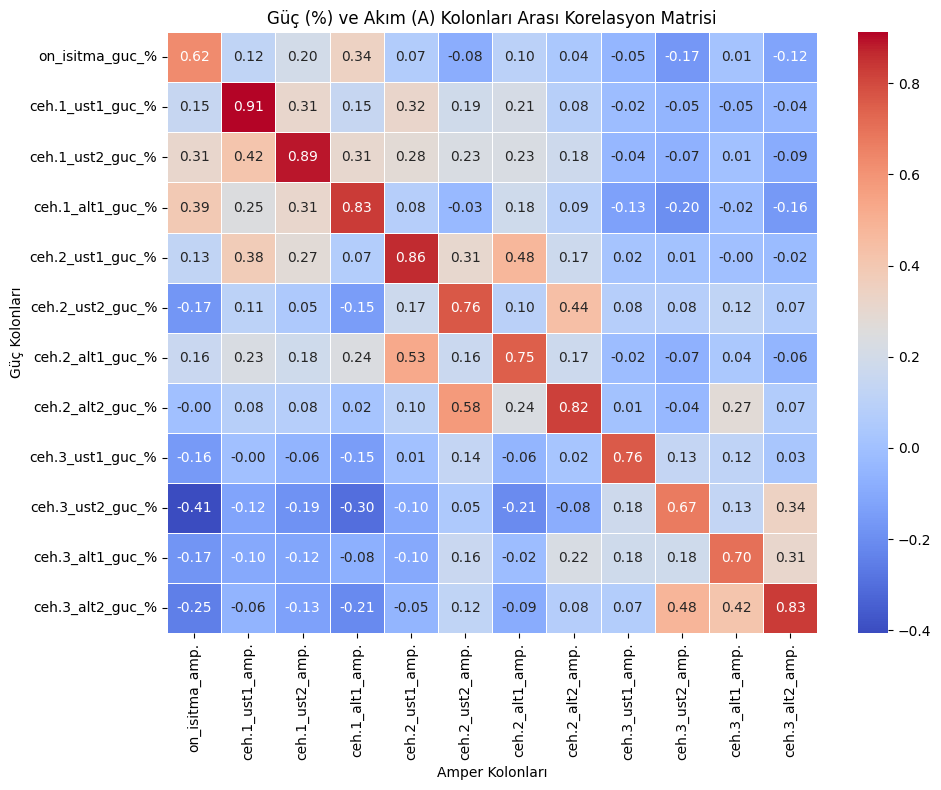

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kolon isimlerini ayƒ±r
guc_kolonlari = [guc for guc, _ in kolon_ciftleri]
amp_kolonlari = [amp for _, amp in kolon_ciftleri]

# Sadece bu kolonlardan olu≈üan veri
df_subset = df[guc_kolonlari + amp_kolonlari]

# Korelasyon matrisi
corr_matrix = df_subset.corr().loc[guc_kolonlari, amp_kolonlari]  # sadece g√º√ß vs amper ili≈ükileri

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("G√º√ß (%) ve Akƒ±m (A) Kolonlarƒ± Arasƒ± Korelasyon Matrisi")
plt.xlabel("Amper Kolonlarƒ±")
plt.ylabel("G√º√ß Kolonlarƒ±")
plt.tight_layout()
plt.show()


In [32]:
# 'datetime'dan 'tarih' ve 'saat' verisi √ßƒ±karma 
df['datetime'] = pd.to_datetime(df['datetime'])  
df = df.set_index('datetime')  
df['tarih'] = df.index.date
df['saat'] = df.index.hour

## Sens√∂r Durum Sƒ±nƒ±flandƒ±rmasƒ±

- Temel ama√ß, g√º√ß (%) ve akƒ±m (amp) sens√∂r deƒüerleri arasƒ±ndaki ili≈ükiye g√∂re fƒ±rƒ±n bile≈üenlerinin durumlarƒ±nƒ± sƒ±nƒ±flandƒ±rmak ve arƒ±za anlarƒ±nƒ± analiz etmek.

In [33]:
df = pd.read_csv("yeni_veri/firin_verileri_temizlenmis.csv")

In [34]:
# gu√ß ve amper kolonlarƒ± (Korelasyonlarƒ± 0.80'den b√ºy√ºk olanlar)
kolon_ciftleri = [
    ('ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.'),
    ('ceh.1_ust2_guc_%', 'ceh.1_ust2_amp.'),
    ('ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.'),
    ('ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.'),
    ('ceh.2_ust2_guc_%', 'ceh.2_ust2_amp.'),
    ('ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.'),
    ('ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.'),
    ('ceh.3_alt2_guc_%', 'ceh.3_alt2_amp.')
]

Kural Tabanlƒ± Sƒ±nƒ±flandƒ±rma

In [35]:
# === Durum sƒ±nƒ±flandƒ±rƒ±cƒ± fonksiyon ===
def durum_siniflandir(guc, akim):
    if guc >= 9 and akim >= 130:
        return "‚úÖ Isƒ±tma aktif"
    elif akim == 0 and guc == 0:
        return "üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli"
    elif akim >= 130 and guc == 0:
        return "‚ö†Ô∏è G√º√ß sens√∂r hatasƒ±"
    elif akim == 0 and guc >= 9:
        return "‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ±"
    else:
        return "ü§î Diƒüer"

In [36]:
for guc_kolon, amp_kolon in kolon_ciftleri:
    durum_kolon = guc_kolon.replace('guc_%', 'durum')

    # Durum sƒ±nƒ±flandƒ±rmasƒ±
    df[durum_kolon] = df.apply(
        lambda row: durum_siniflandir(row[guc_kolon], row[amp_kolon]),
        axis=1
    )

    # Durum sayƒ±sƒ± √∂zeti
    durum_sayilari = df[durum_kolon].value_counts()
    print(f"üìä {durum_kolon} Durum √ñzeti:")
    print(durum_sayilari)
    print("--------------------------------------------------")

üìä ceh.1_ust1_durum Durum √ñzeti:
ceh.1_ust1_durum
‚úÖ Isƒ±tma aktif                       17951
üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli     3664
‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ±                  414
‚ö†Ô∏è G√º√ß sens√∂r hatasƒ±                    73
ü§î Diƒüer                                 38
Name: count, dtype: int64
--------------------------------------------------
üìä ceh.1_ust2_durum Durum √ñzeti:
ceh.1_ust2_durum
‚úÖ Isƒ±tma aktif                       20132
üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli     1111
ü§î Diƒüer                                439
‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ±                  431
‚ö†Ô∏è G√º√ß sens√∂r hatasƒ±                    27
Name: count, dtype: int64
--------------------------------------------------
üìä ceh.1_alt1_durum Durum √ñzeti:
ceh.1_alt1_durum
‚úÖ Isƒ±tma aktif                       17669
üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli     2500
‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ±                 1222
ü§î Diƒüer                                385
‚ö†Ô∏è G√

In [37]:
# Bu kod her satƒ±r i√ßin t√ºm bile≈üenlerin durumlarƒ±nƒ± tarƒ±yor ve eƒüer herhangi birinde bir uyarƒ± durumu varsa o satƒ±ra 'üö® Uyarƒ±', yoksa '‚úÖ Normal' etiketi veriyor.

# Korelasyonlarƒ± y√ºksek olan hedef s√ºtunlar
durum_kolonlari = [
    'ceh.1_ust1_durum', 'ceh.1_ust2_durum',
    'ceh.1_alt1_durum', 'ceh.2_ust1_durum', 'ceh.2_ust2_durum',
    'ceh.2_alt1_durum', 'ceh.2_alt2_durum', 'ceh.3_alt2_durum'
]

uyari_durumlari = [
    'üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli',
    '‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ±',
    '‚ö†Ô∏è G√º√ß sens√∂r hatasƒ±',
    'ü§î Diƒüer'
]

# Satƒ±rda herhangi bir uyarƒ± varsa "üö® Uyarƒ±", yoksa "‚úÖ Normal"
df['genel_uyari'] = df[durum_kolonlari].apply(
    lambda row: 'üö® Uyarƒ±' if any(durum in uyari_durumlari for durum in row) else '‚úÖ Normal',
    axis=1
)


In [38]:
# Toplam uyarƒ± sayƒ±sƒ±
toplam_uyari = (df['genel_uyari'] == 'üö® Uyarƒ±').sum()
print(f"Toplam uyarƒ± sayƒ±sƒ±: {toplam_uyari}")

Toplam uyarƒ± sayƒ±sƒ±: 11286


In [39]:
# Toplam uyarƒ± sayƒ±sƒ±
toplam_uyari = (df['genel_uyari'] == '‚úÖ Normal').sum()
print(f"Toplam uyarƒ± sayƒ±sƒ±: {toplam_uyari}")

Toplam uyarƒ± sayƒ±sƒ±: 10854


In [40]:
df.columns

Index(['datetime', 'prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.

### Arƒ±zalar ƒ∞√ßin Durum Analizi

Ama√ß, √ºretim s√ºrecinde ya≈üanan arƒ±zalarƒ± sistematik olarak tespit ederek, bu arƒ±zalarƒ±n ne zaman, ne kadar s√ºreyle ve ne sƒ±klƒ±kla meydana geldiƒüini analiz etmektir.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time


# === Uzun s√ºreli arƒ±zalarƒ± getiren fonksiyon ===
def ariza_gruplarini_getir(df, durum_kolon, zaman_kolon="datetime", ariza_durumu="üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli"):
    def tamamen_mesai_icinde(grup):
        bas_dt = grup["baslangic"]
        bit_dt = grup["bitis"]
        ayni_gun_mu = bas_dt.date() == bit_dt.date()
        mesai_baslangic = time(8, 0, 0)
        mesai_bitis = time(16, 59, 59)
        saat_araliginda_mi = (
            mesai_baslangic <= bas_dt.time() <= mesai_bitis and
            mesai_baslangic <= bit_dt.time() <= mesai_bitis
        )
        return ayni_gun_mu and saat_araliginda_mi

    df = df.sort_values(zaman_kolon)
    df["durum_shift"] = df[durum_kolon].shift(1)
    df["yeni_grup"] = (df[durum_kolon] != df["durum_shift"]).cumsum()

    ariza_df = df[df[durum_kolon] == ariza_durumu]
    ariza_gruplari = ariza_df.groupby("yeni_grup").agg(
        baslangic=(zaman_kolon, "first"),
        bitis=(zaman_kolon, "last"),
        dakika=(zaman_kolon, lambda x: (x.max() - x.min()).total_seconds() / 60),
        adet=(zaman_kolon, "count")
    ).reset_index()

    ariza_gruplari["mesai_ici"] = ariza_gruplari.apply(tamamen_mesai_icinde, axis=1)

    uzun_duruslar = ariza_gruplari[
        (ariza_gruplari["dakika"] >= 5) & (ariza_gruplari["mesai_ici"])
    ]
    return uzun_duruslar

# === Grafik 1: G√ºnl√ºk toplam duru≈ü s√ºresi ===
def gunluk_durus_suresi_grafigi(arizalar, baslik_etiket, ariza_durumu="üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli"):
    df = arizalar.copy()
    df["tarih"] = df["baslangic"].dt.date
    gunluk_durus = df.groupby("tarih")["dakika"].sum().reset_index()
    gunluk_durus = gunluk_durus.sort_values("dakika", ascending=False)

    plt.figure(figsize=(6, 4))
    plt.bar(gunluk_durus["tarih"].astype(str), gunluk_durus["dakika"], color='firebrick')
    plt.xticks(rotation=45)
    plt.title(f"{ariza_durumu} / üîß G√ºnl√ºk Duru≈ü S√ºresi - {baslik_etiket}")
    plt.xlabel("Tarih")
    plt.ylabel("Toplam Duru≈ü S√ºresi (dk)")
    plt.tight_layout()
    plt.show()

    return gunluk_durus

# === Grafik 2: Saatlik duru≈ü s√ºresi === Hangi g√ºnlerde toplamda ne kadar s√ºre arƒ±za olmu≈ü, bar grafiƒüiyle g√∂sterir.En √ßok duru≈ü olan g√ºnleri hƒ±zlƒ±ca g√∂rmeyi saƒülar.
def saatlik_durus_suresi_grafigi(arizalar, ariza_durumu = "üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli"):
    df = arizalar.copy()
    df["saat"] = df["baslangic"].dt.hour
    saatlik_durus = df.groupby("saat")["dakika"].sum().reset_index()

    plt.figure(figsize=(6, 4))
    plt.bar(saatlik_durus["saat"], saatlik_durus["dakika"], color='orange')
    plt.xticks(saatlik_durus["saat"])
    plt.title(f"{ariza_durumu} / ‚è∞ Saatlik Toplam Duru≈ü S√ºresi")
    plt.xlabel("Saat")
    plt.ylabel("Toplam Duru≈ü (dk)")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    return saatlik_durus

# === Grafik 3: Arƒ±za anlarƒ±nda g√º√ß ve akƒ±m ===
def ariza_anlarinda_guc_ve_akim_grafigi(df, guc_kolon, amp_kolon, durum_kolon, ariza_durumu="üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli"):
    ariza_df = df[df[durum_kolon] == ariza_durumu]

    plt.figure(figsize=(6, 4))
    plt.plot(ariza_df["datetime"], ariza_df[guc_kolon], label="G√º√ß (%)", color="red")
    plt.plot(ariza_df["datetime"], ariza_df[amp_kolon], label="Akƒ±m (Amp)", color="blue", alpha=0.6)
    plt.title(f"‚ö° '{ariza_durumu}' Anlarƒ±ndaki G√º√ß ve Akƒ±m Deƒüi≈üimi")
    plt.xlabel("Zaman")
    plt.ylabel("Deƒüer")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [42]:
def sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli"):
    """
    Verilen sensor kolon √ßiftlerine g√∂re belirtilen arƒ±za durumu i√ßin detaylƒ± analiz ve g√∂rselle≈ütirme yapar.

    Parametreler:
    - df: pandas DataFrame (datetime i√ßeren, g√º√ß ve akƒ±m kolonlarƒ±nƒ± i√ßeren veri)
    - kolon_ciftleri: liste, her eleman bir (guc_kolon, amp_kolon) tuple'ƒ±
    - ariza_durum: str, analiz edilecek spesifik arƒ±za durumu metni

    √áƒ±ktƒ±:
    - Her kolon √ßifti i√ßin: 
        - Durum √∂zeti (print)
        - G√ºnl√ºk duru≈ü s√ºresi grafiƒüi
        - Saatlik duru≈ü s√ºresi grafiƒüi
        - Arƒ±za anlarƒ±ndaki g√º√ß ve akƒ±m deƒüi≈üim grafiƒüi
    """

    for guc_kolon, amp_kolon in kolon_ciftleri:
        durum_kolon = guc_kolon.replace('guc_%', 'durum')
        
        print(f"\nüîç {ariza_durum} Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: {guc_kolon} & {amp_kolon} ‚Üí {durum_kolon}")
        print("--------------------------------------------------")

        # Durum sƒ±nƒ±flandƒ±rmasƒ±
        df[durum_kolon] = df.apply(
            lambda row: durum_siniflandir(row[guc_kolon], row[amp_kolon]),
            axis=1
        )
        # Uzun s√ºreli arƒ±zalarƒ± al
        uzun_arizalar = ariza_gruplarini_getir(df, durum_kolon=durum_kolon, ariza_durumu=ariza_durum)

        # Grafikler
        gunluk_durus_suresi_grafigi(uzun_arizalar, baslik_etiket=guc_kolon.split('_')[0], ariza_durumu=ariza_durum)
        saatlik_durus_suresi_grafigi(uzun_arizalar, ariza_durumu=ariza_durum)
        ariza_anlarinda_guc_ve_akim_grafigi(df, guc_kolon, amp_kolon, durum_kolon=durum_kolon, ariza_durumu=ariza_durum)


In [43]:
df["datetime"] = pd.to_datetime(df["datetime"])

# üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli


üîç üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.1_ust1_guc_% & ceh.1_ust1_amp. ‚Üí ceh.1_ust1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


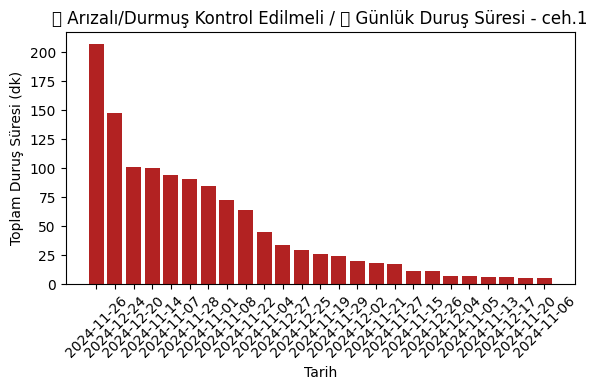

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


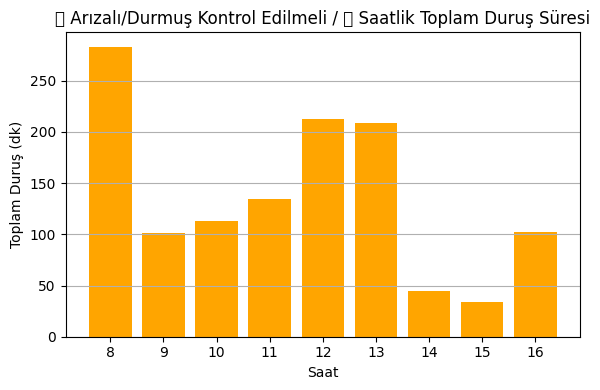

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


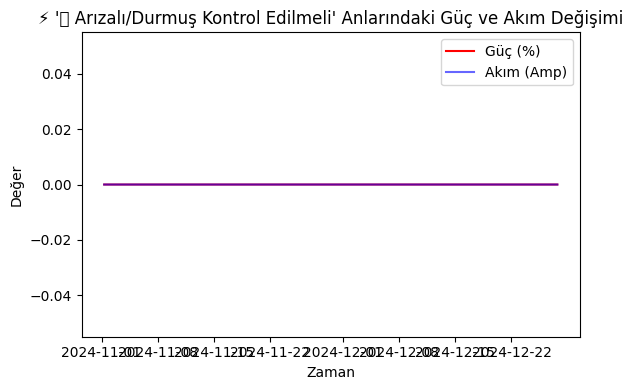


üîç üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.1_ust2_guc_% & ceh.1_ust2_amp. ‚Üí ceh.1_ust2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


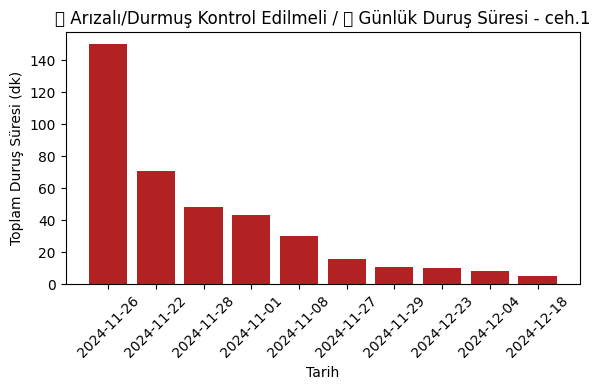

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


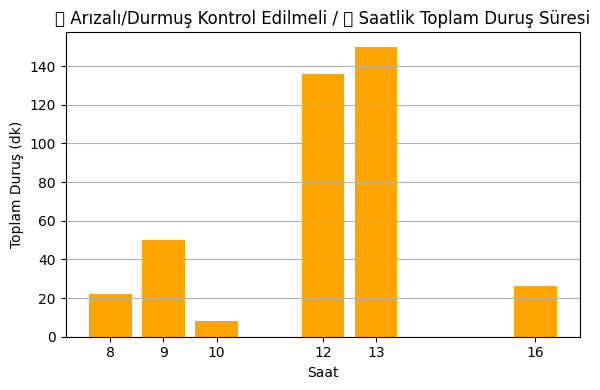

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


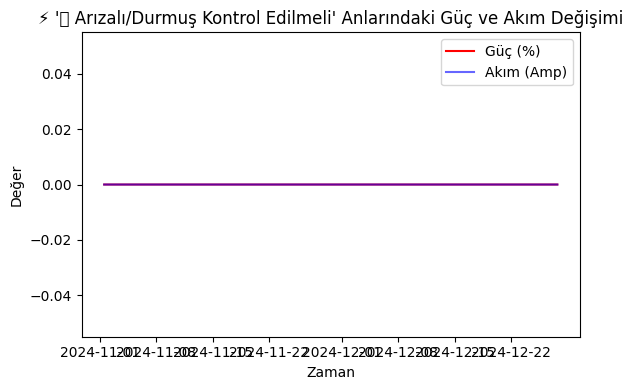


üîç üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.1_alt1_guc_% & ceh.1_alt1_amp. ‚Üí ceh.1_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


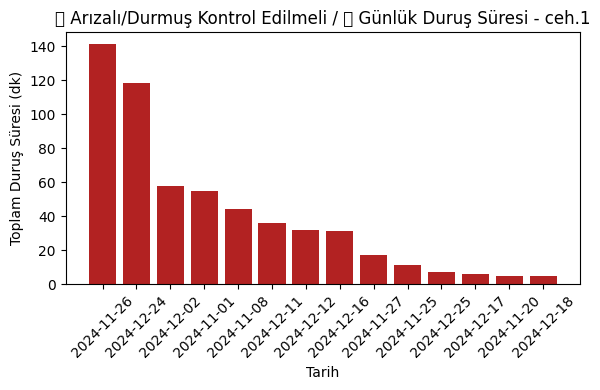

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


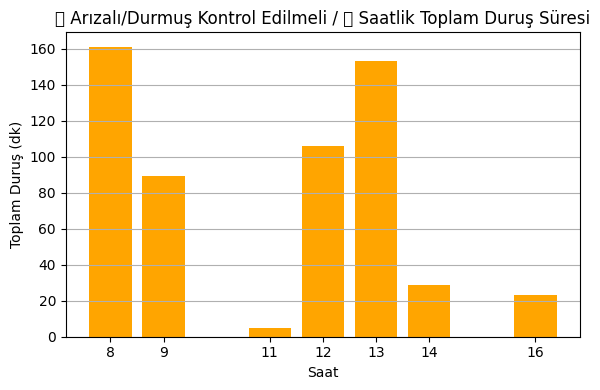

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


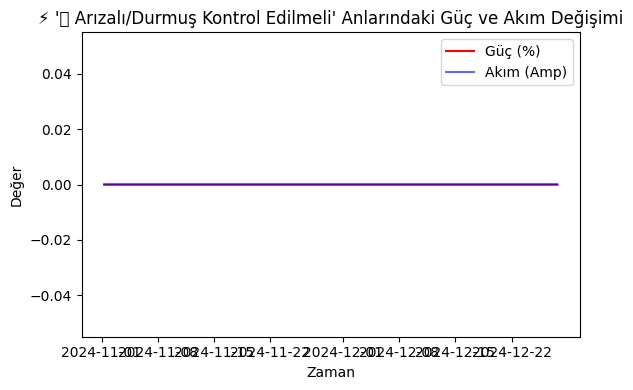


üîç üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.2_ust1_guc_% & ceh.2_ust1_amp. ‚Üí ceh.2_ust1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


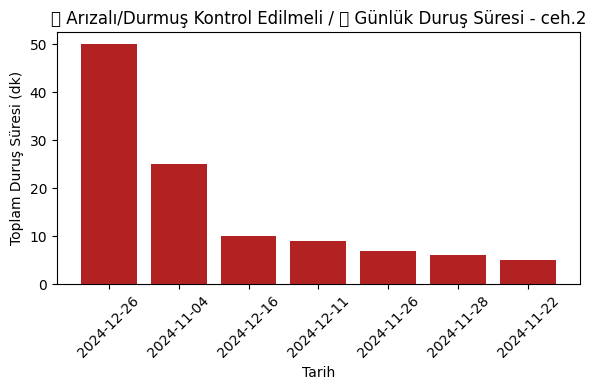

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


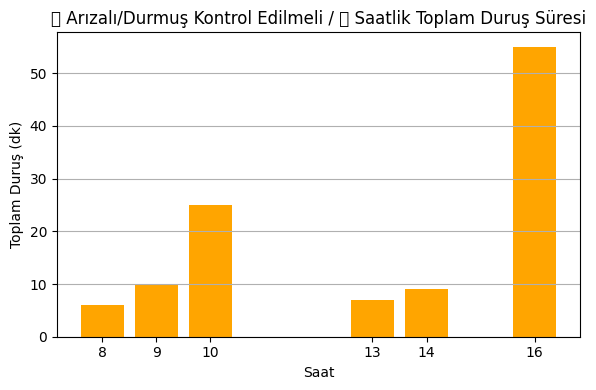

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


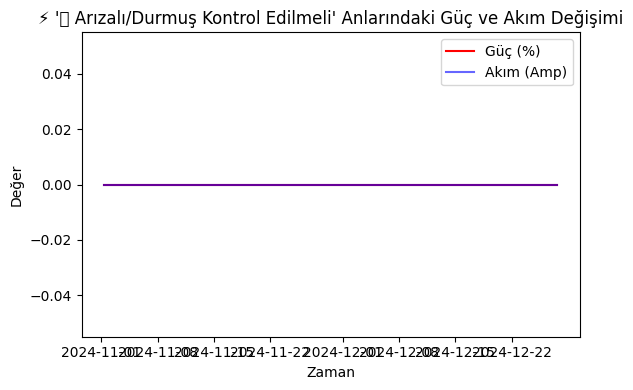


üîç üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.2_ust2_guc_% & ceh.2_ust2_amp. ‚Üí ceh.2_ust2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


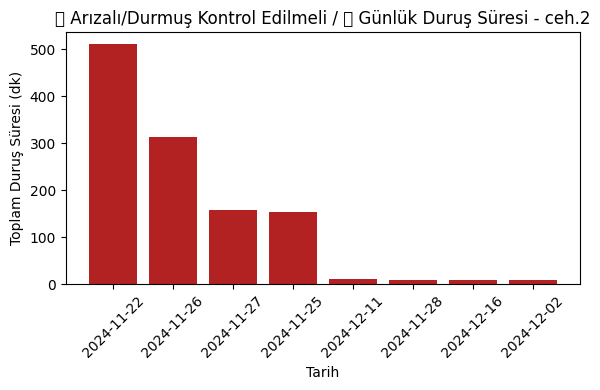

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


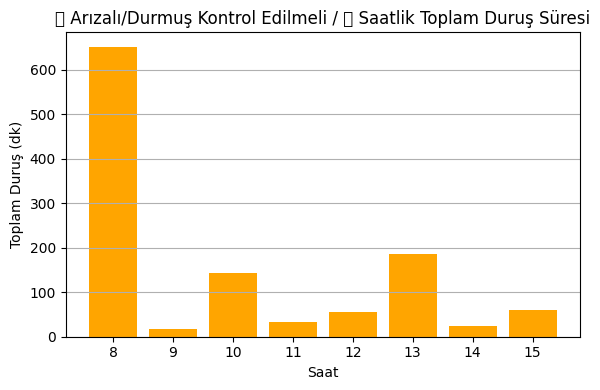

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


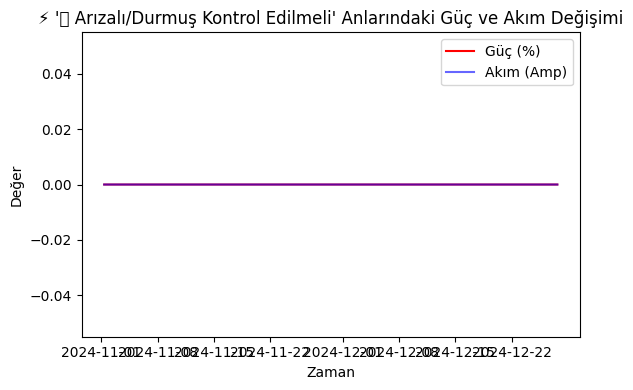


üîç üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.2_alt1_guc_% & ceh.2_alt1_amp. ‚Üí ceh.2_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


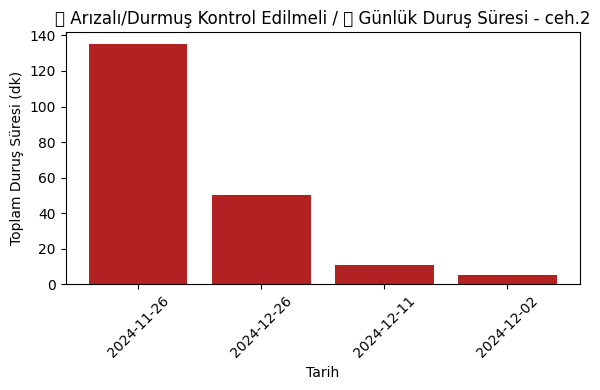

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


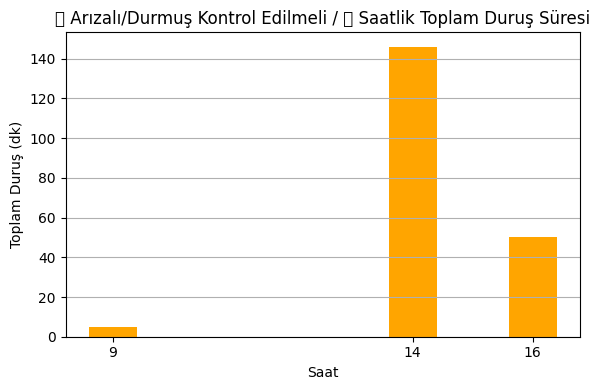

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


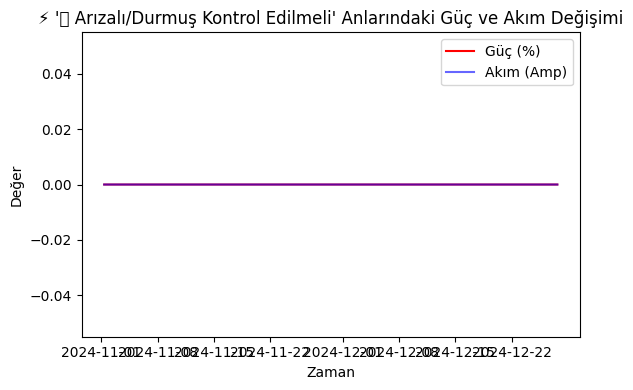


üîç üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.2_alt2_guc_% & ceh.2_alt2_amp. ‚Üí ceh.2_alt2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


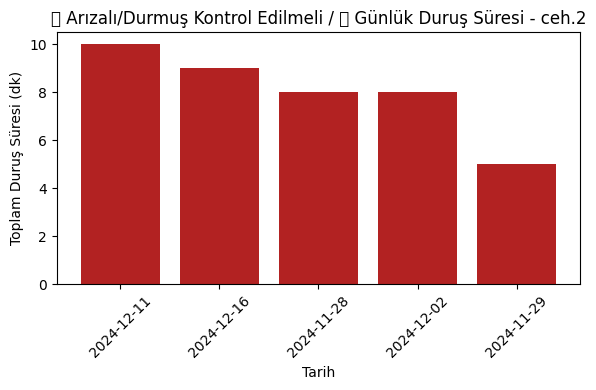

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


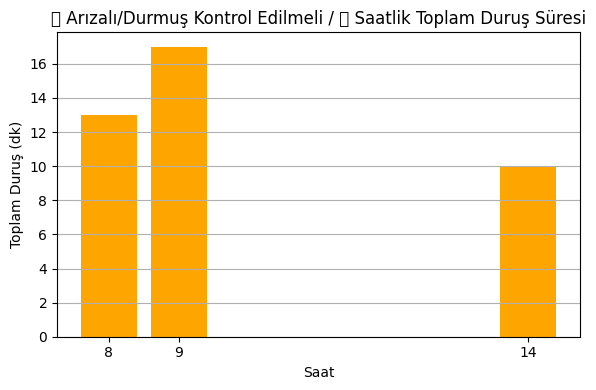

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


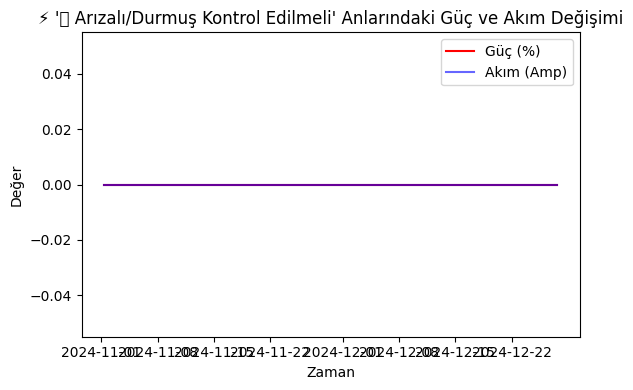


üîç üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.3_alt2_guc_% & ceh.3_alt2_amp. ‚Üí ceh.3_alt2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


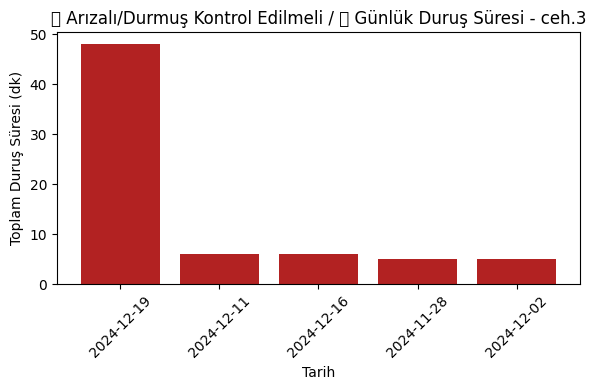

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


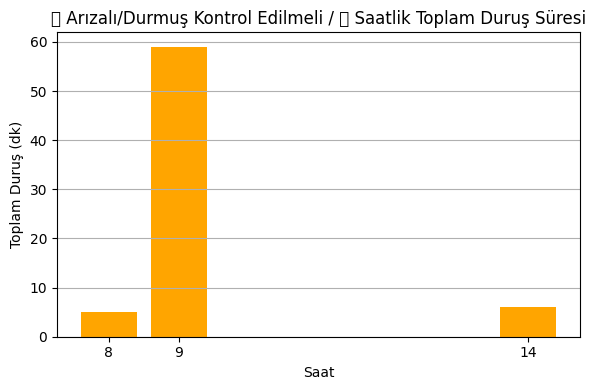

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


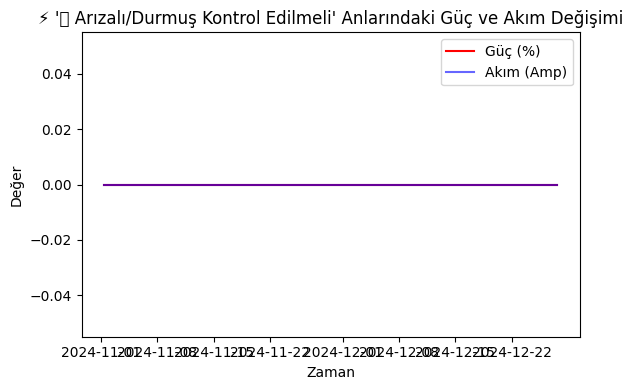

In [44]:
sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli")

# ‚ö†Ô∏è G√º√ß sens√∂r hatasƒ±


üîç ‚ö†Ô∏è G√º√ß sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.1_ust1_guc_% & ceh.1_ust1_amp. ‚Üí ceh.1_ust1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


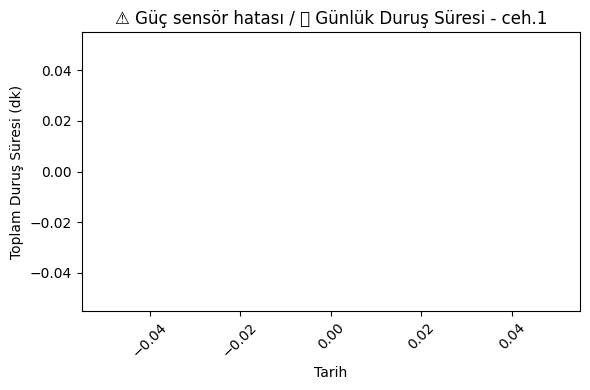

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


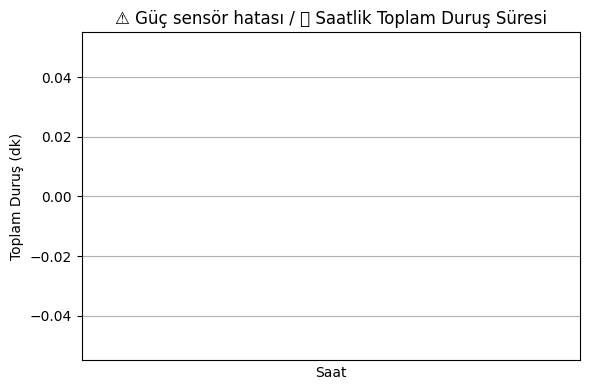

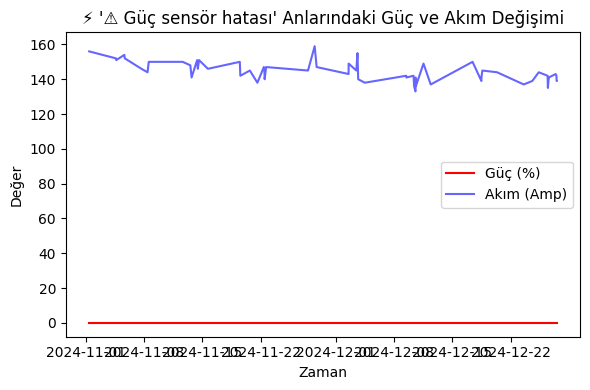


üîç ‚ö†Ô∏è G√º√ß sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.1_ust2_guc_% & ceh.1_ust2_amp. ‚Üí ceh.1_ust2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


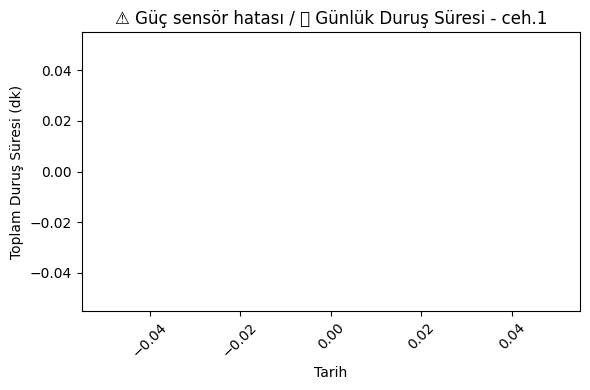

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


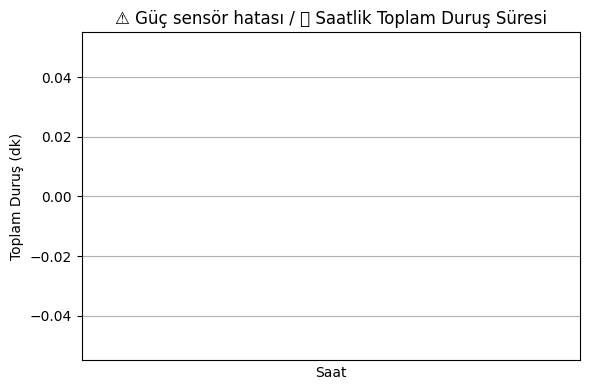

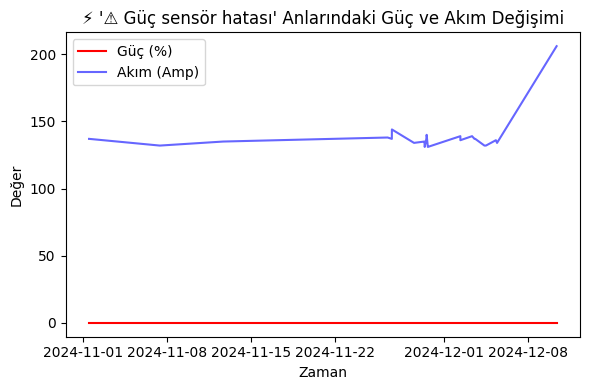


üîç ‚ö†Ô∏è G√º√ß sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.1_alt1_guc_% & ceh.1_alt1_amp. ‚Üí ceh.1_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


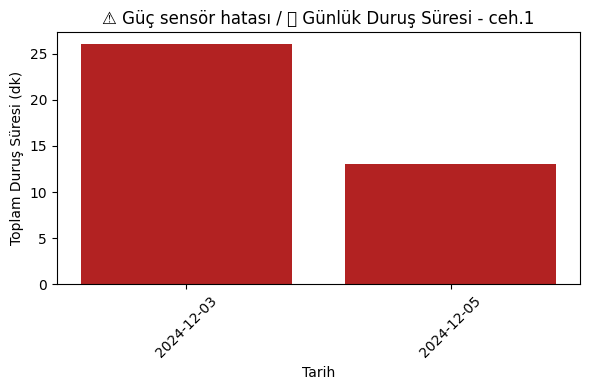

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


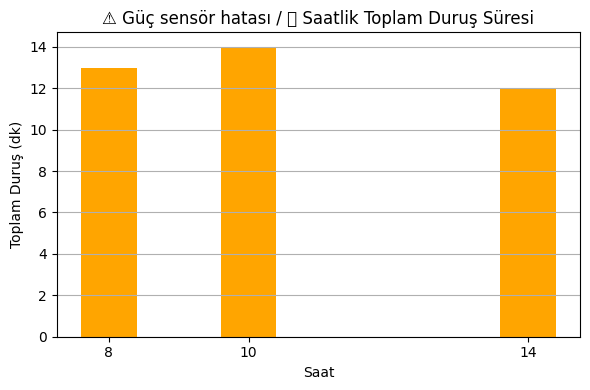

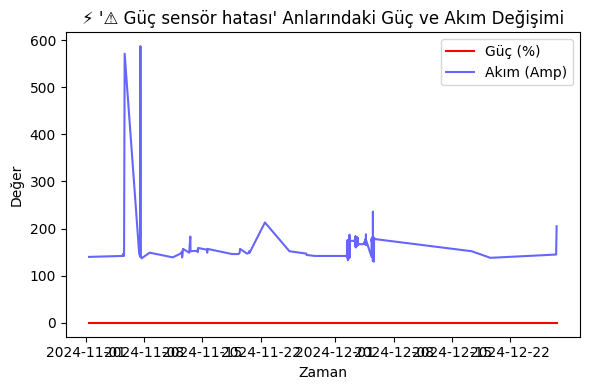


üîç ‚ö†Ô∏è G√º√ß sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.2_ust1_guc_% & ceh.2_ust1_amp. ‚Üí ceh.2_ust1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


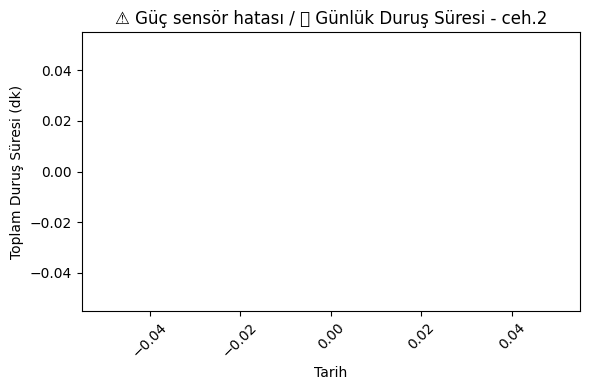

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


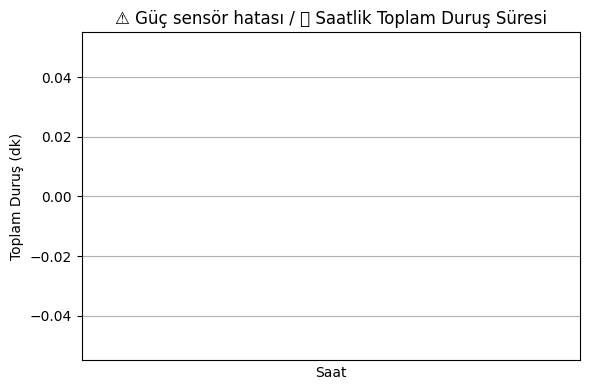

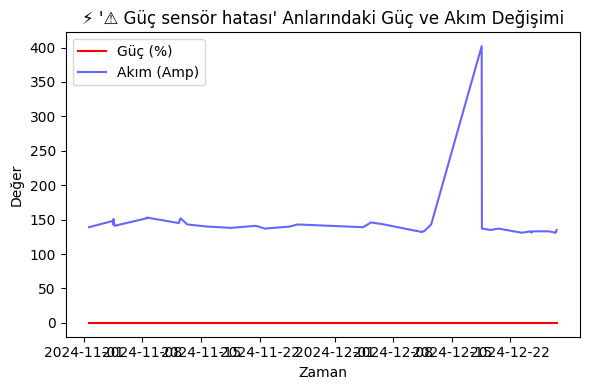


üîç ‚ö†Ô∏è G√º√ß sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.2_ust2_guc_% & ceh.2_ust2_amp. ‚Üí ceh.2_ust2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


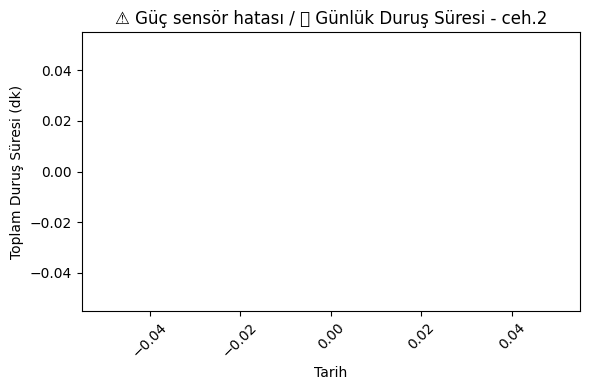

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


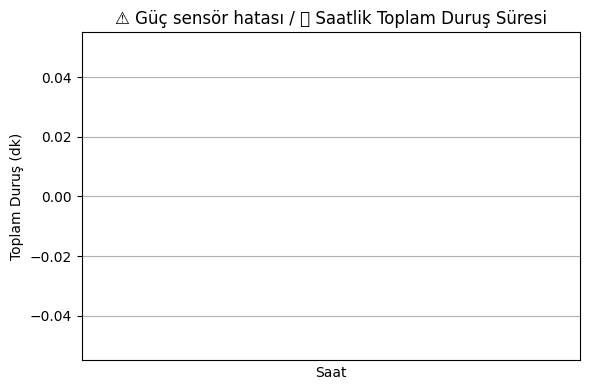

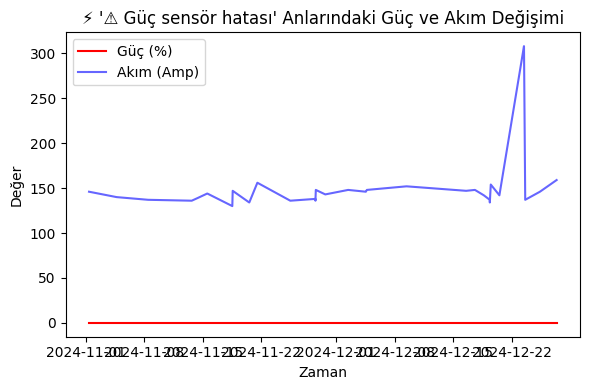


üîç ‚ö†Ô∏è G√º√ß sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.2_alt1_guc_% & ceh.2_alt1_amp. ‚Üí ceh.2_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


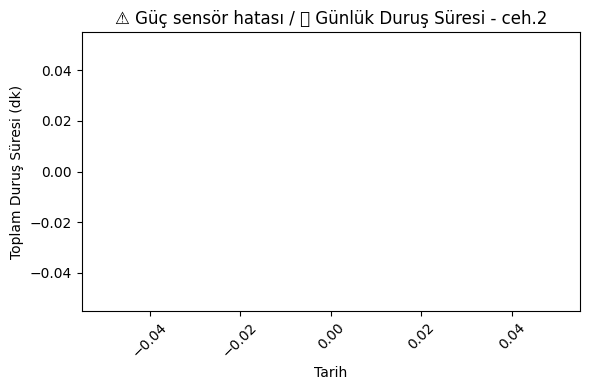

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


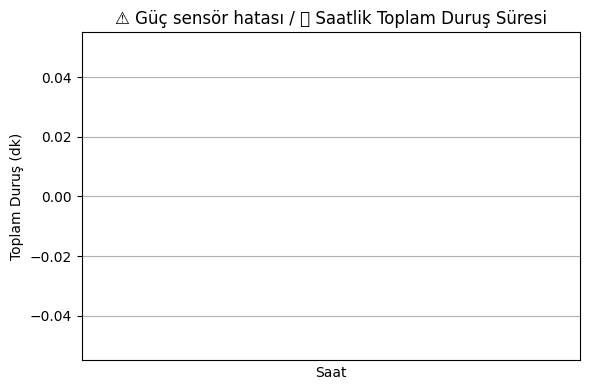

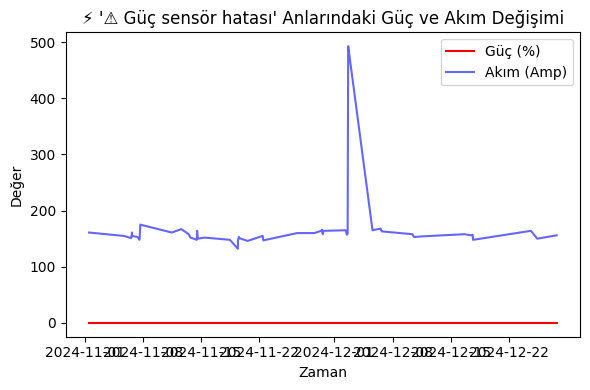


üîç ‚ö†Ô∏è G√º√ß sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.2_alt2_guc_% & ceh.2_alt2_amp. ‚Üí ceh.2_alt2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


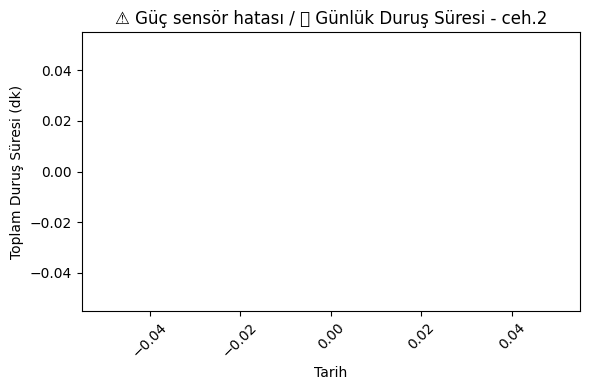

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


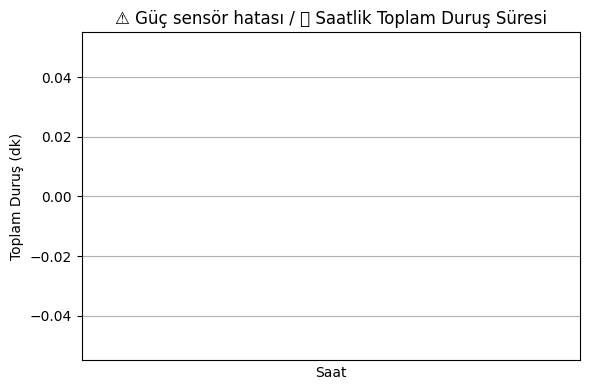

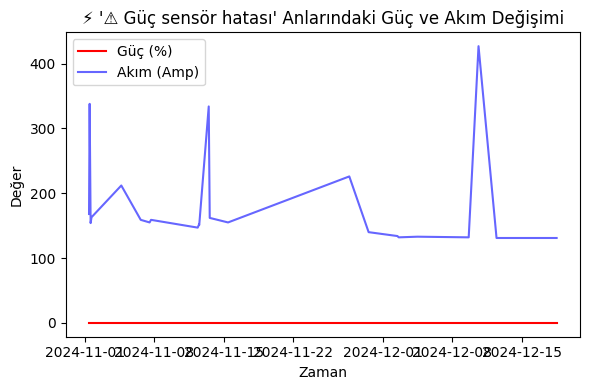


üîç ‚ö†Ô∏è G√º√ß sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.3_alt2_guc_% & ceh.3_alt2_amp. ‚Üí ceh.3_alt2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


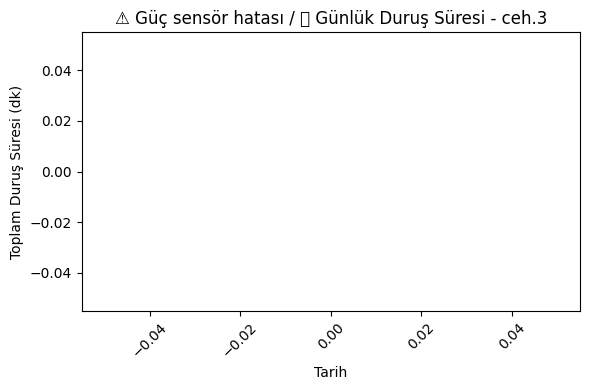

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


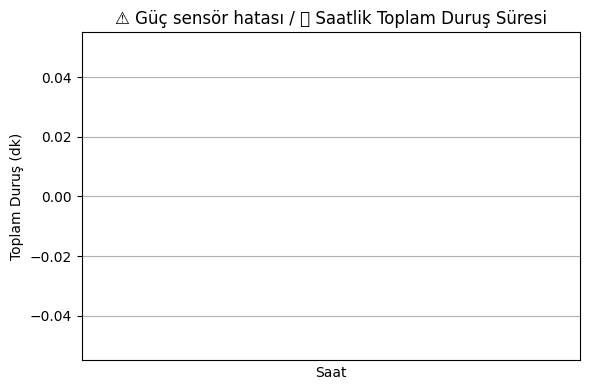

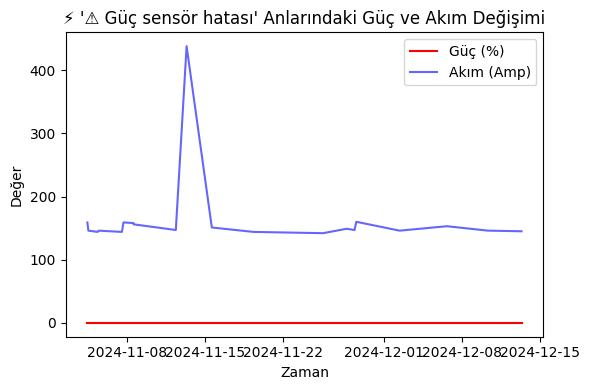

In [45]:
sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="‚ö†Ô∏è G√º√ß sens√∂r hatasƒ±")


# ‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ±


üîç ‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.1_ust1_guc_% & ceh.1_ust1_amp. ‚Üí ceh.1_ust1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


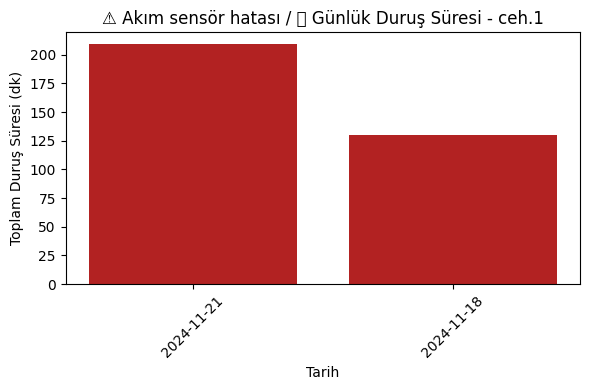

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


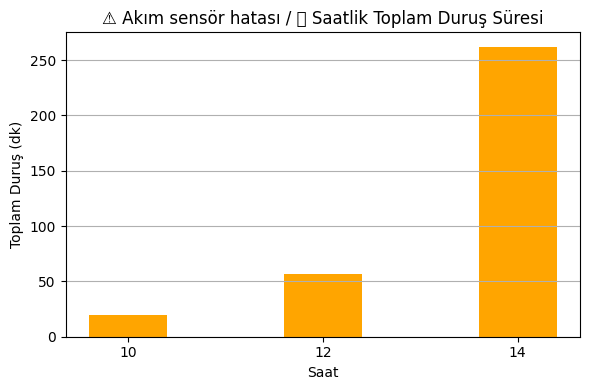

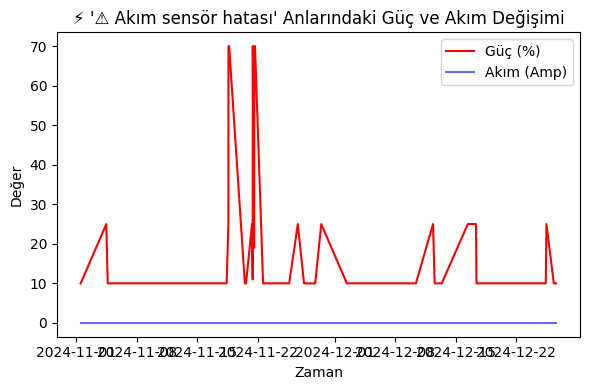


üîç ‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.1_ust2_guc_% & ceh.1_ust2_amp. ‚Üí ceh.1_ust2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


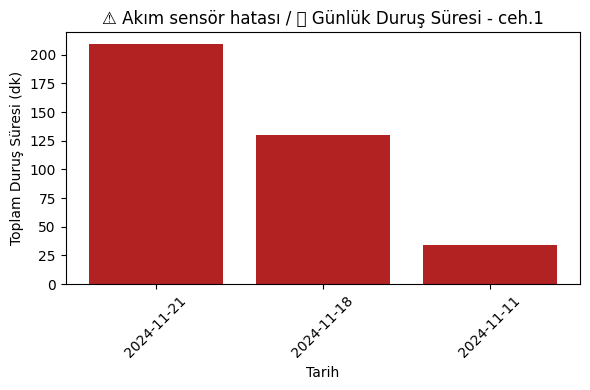

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


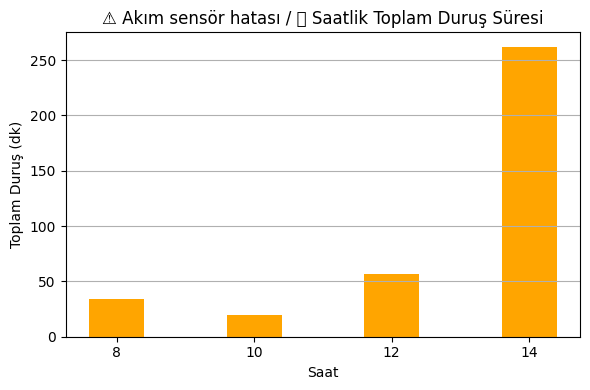

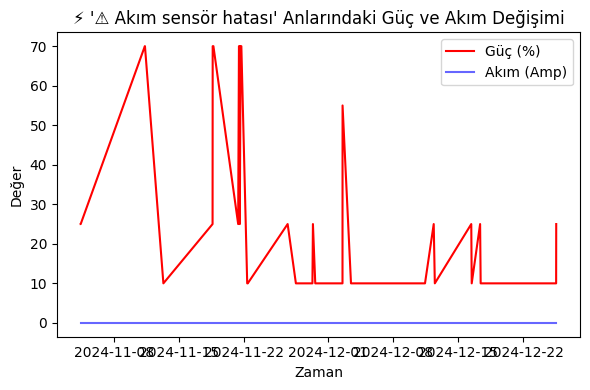


üîç ‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.1_alt1_guc_% & ceh.1_alt1_amp. ‚Üí ceh.1_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


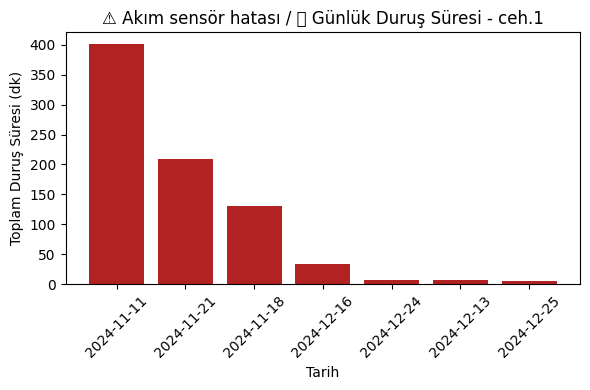

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


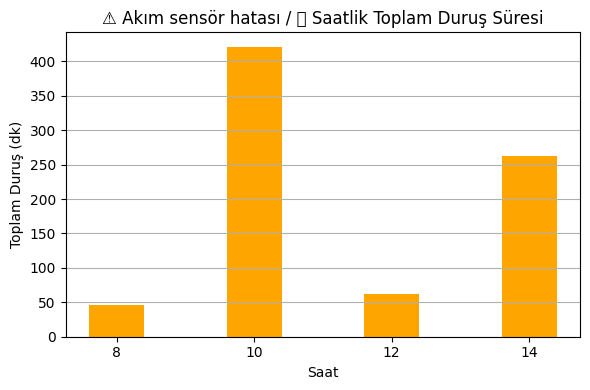

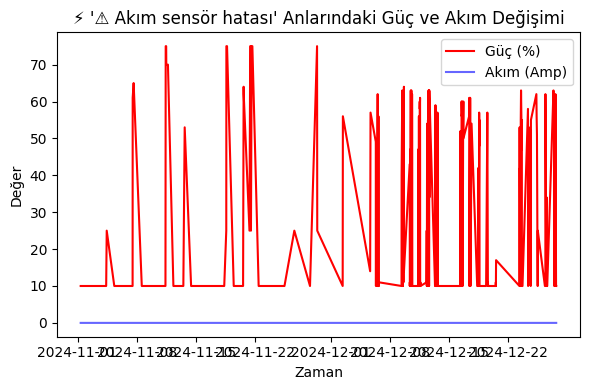


üîç ‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.2_ust1_guc_% & ceh.2_ust1_amp. ‚Üí ceh.2_ust1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


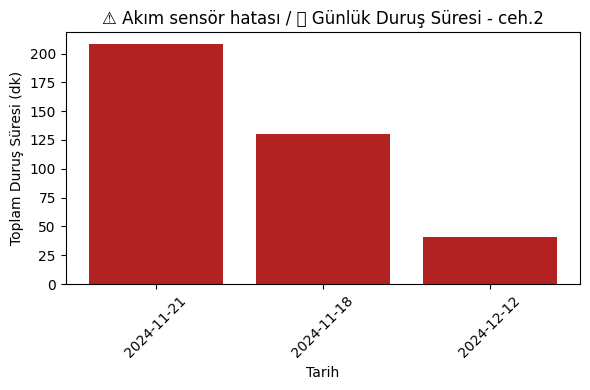

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


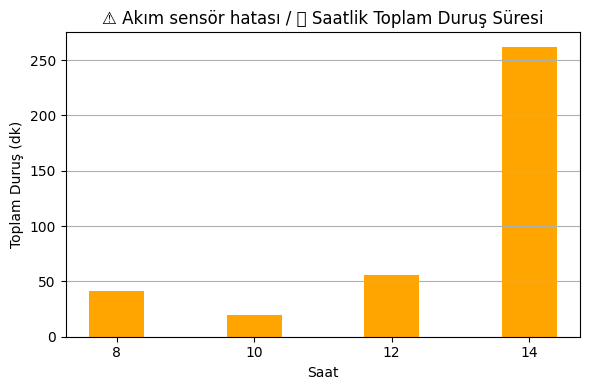

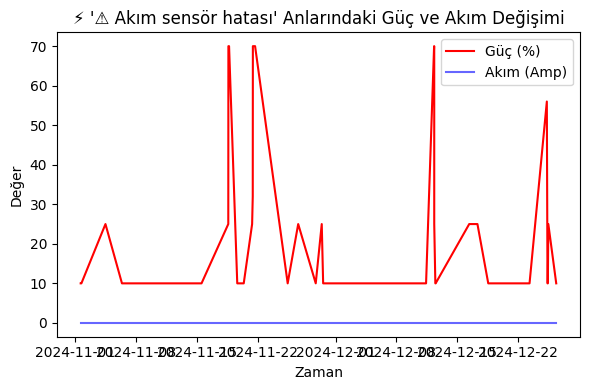


üîç ‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.2_ust2_guc_% & ceh.2_ust2_amp. ‚Üí ceh.2_ust2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


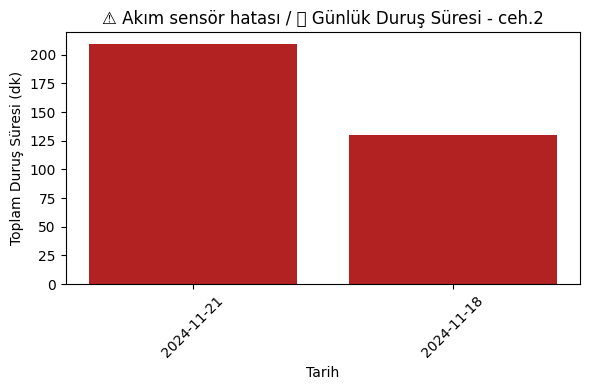

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


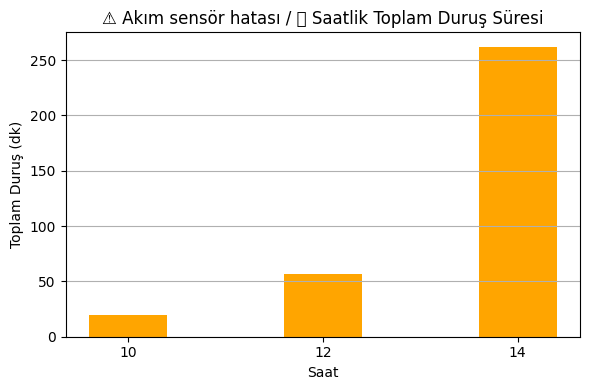

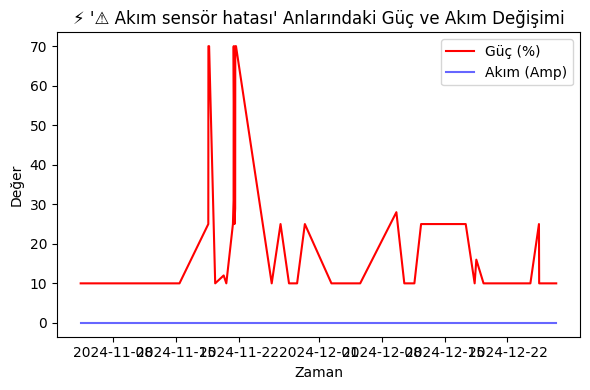


üîç ‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.2_alt1_guc_% & ceh.2_alt1_amp. ‚Üí ceh.2_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


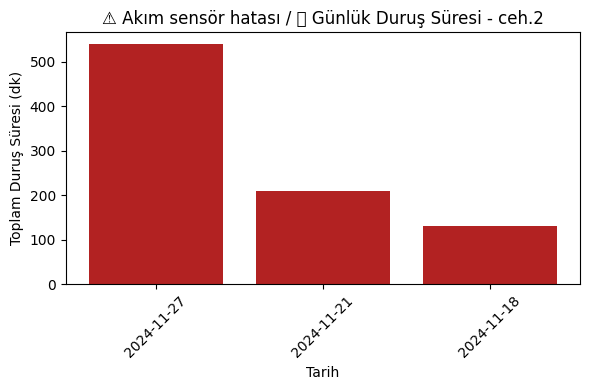

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


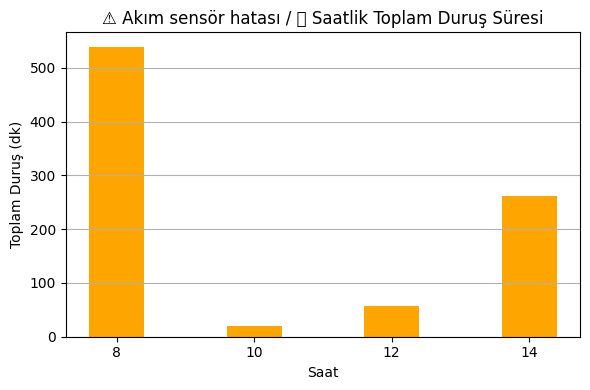

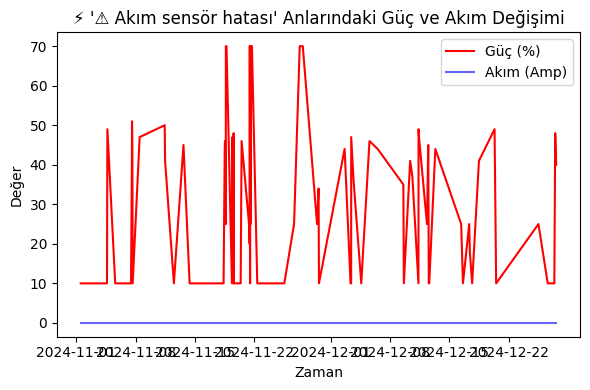


üîç ‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.2_alt2_guc_% & ceh.2_alt2_amp. ‚Üí ceh.2_alt2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


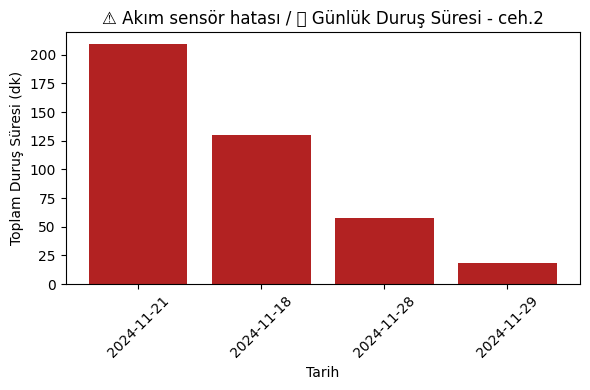

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


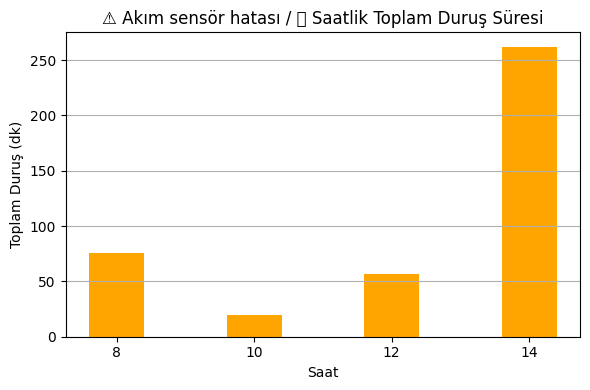

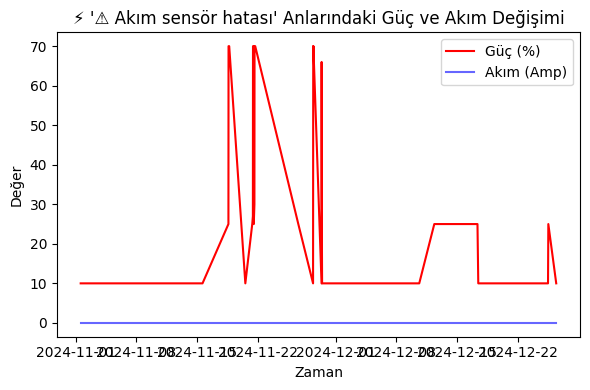


üîç ‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.3_alt2_guc_% & ceh.3_alt2_amp. ‚Üí ceh.3_alt2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


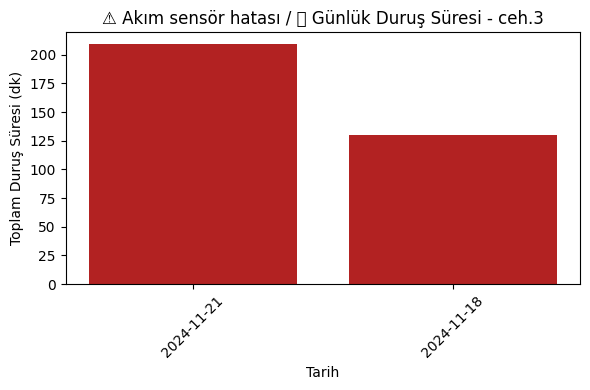

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


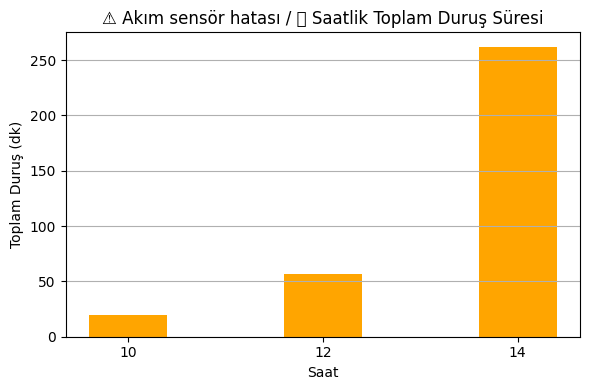

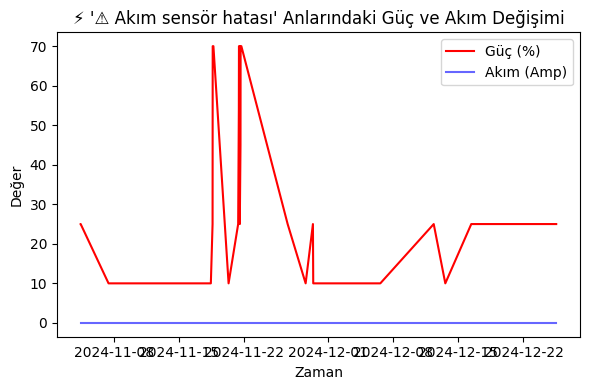

In [46]:
sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ±")

### Raporlama i√ßin tek kolon √ßifti arƒ±zalarƒ± i√ßin durum analizi


üîç üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.1_alt1_guc_% & ceh.1_alt1_amp. ‚Üí ceh.1_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


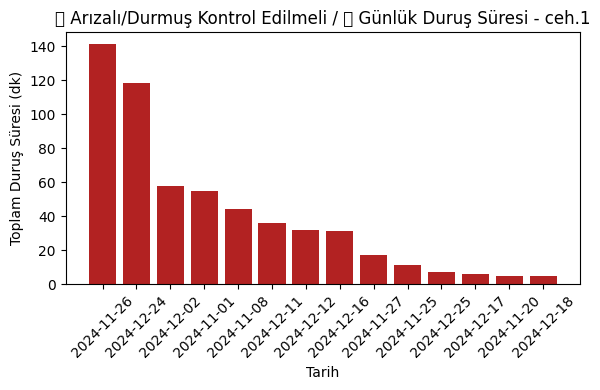

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


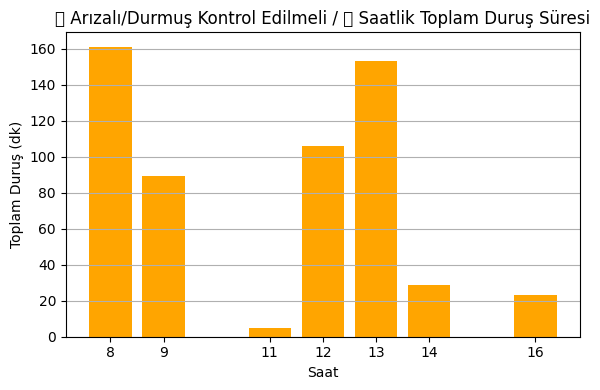

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


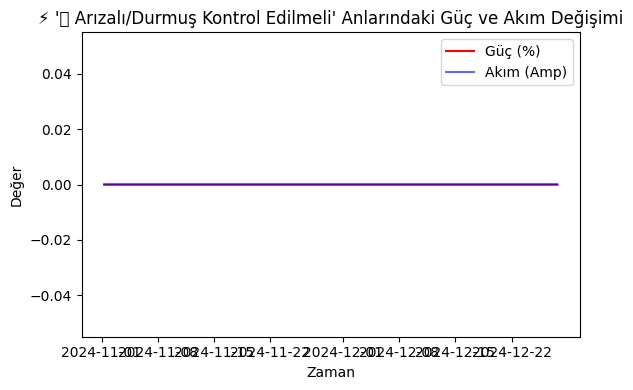

In [47]:
kolon_ciftleri = [("ceh.1_alt1_guc_%", "ceh.1_alt1_amp.")]
sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli")


üîç ‚ö†Ô∏è G√º√ß sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.1_alt1_guc_% & ceh.1_alt1_amp. ‚Üí ceh.1_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


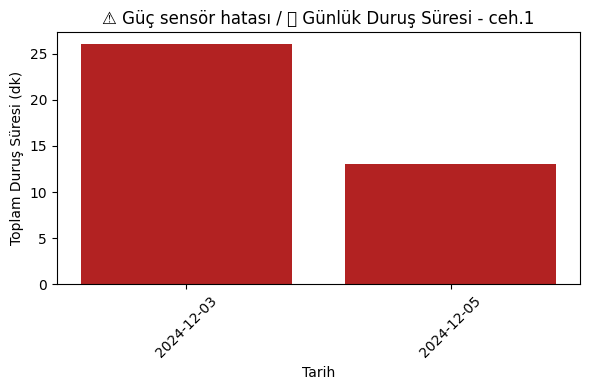

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


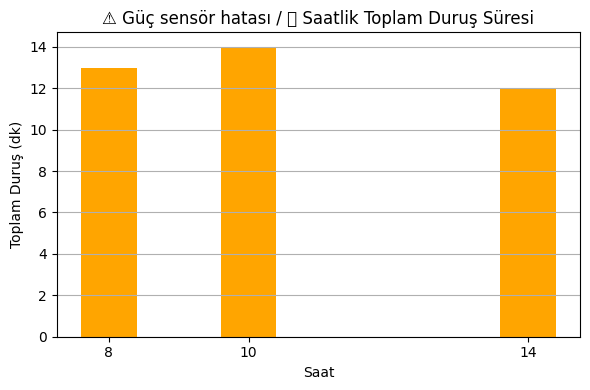

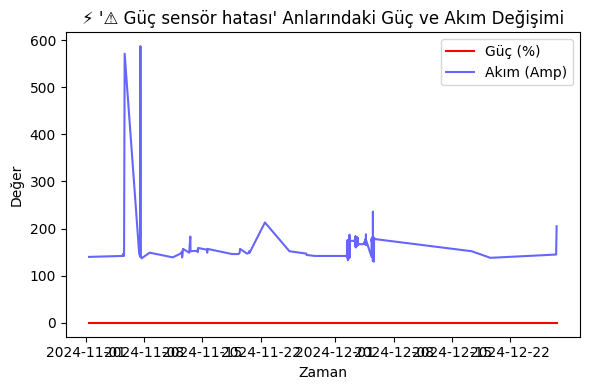

In [48]:
sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="‚ö†Ô∏è G√º√ß sens√∂r hatasƒ±")


üîç ‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ± Arƒ±zasƒ± i√ßin ƒ∞≈üleniyor: ceh.1_alt1_guc_% & ceh.1_alt1_amp. ‚Üí ceh.1_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


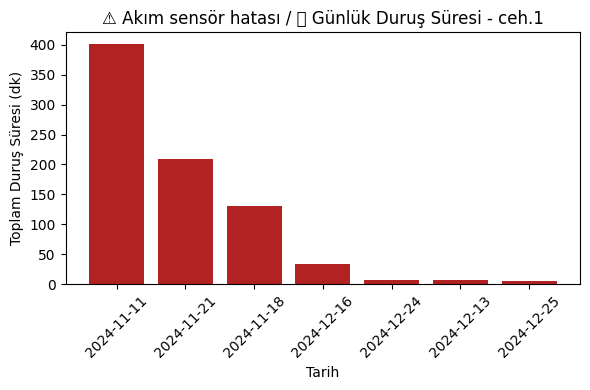

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


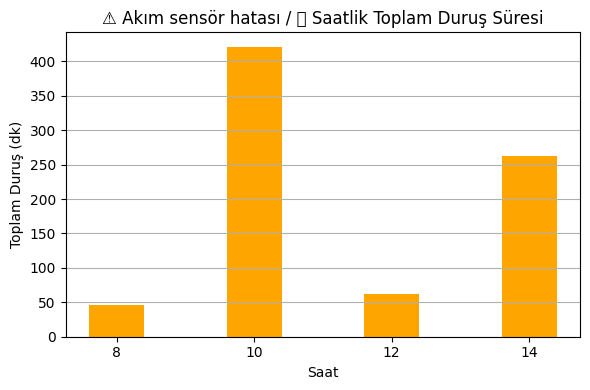

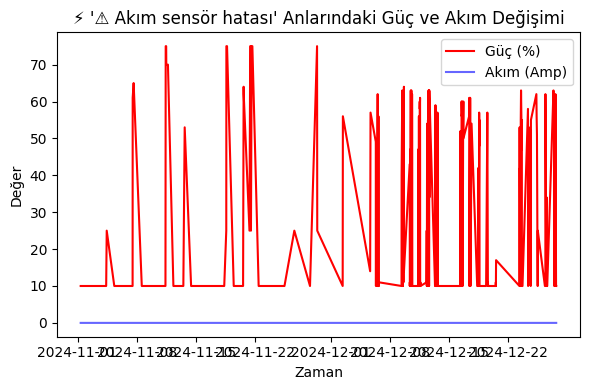

In [49]:
sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ±")